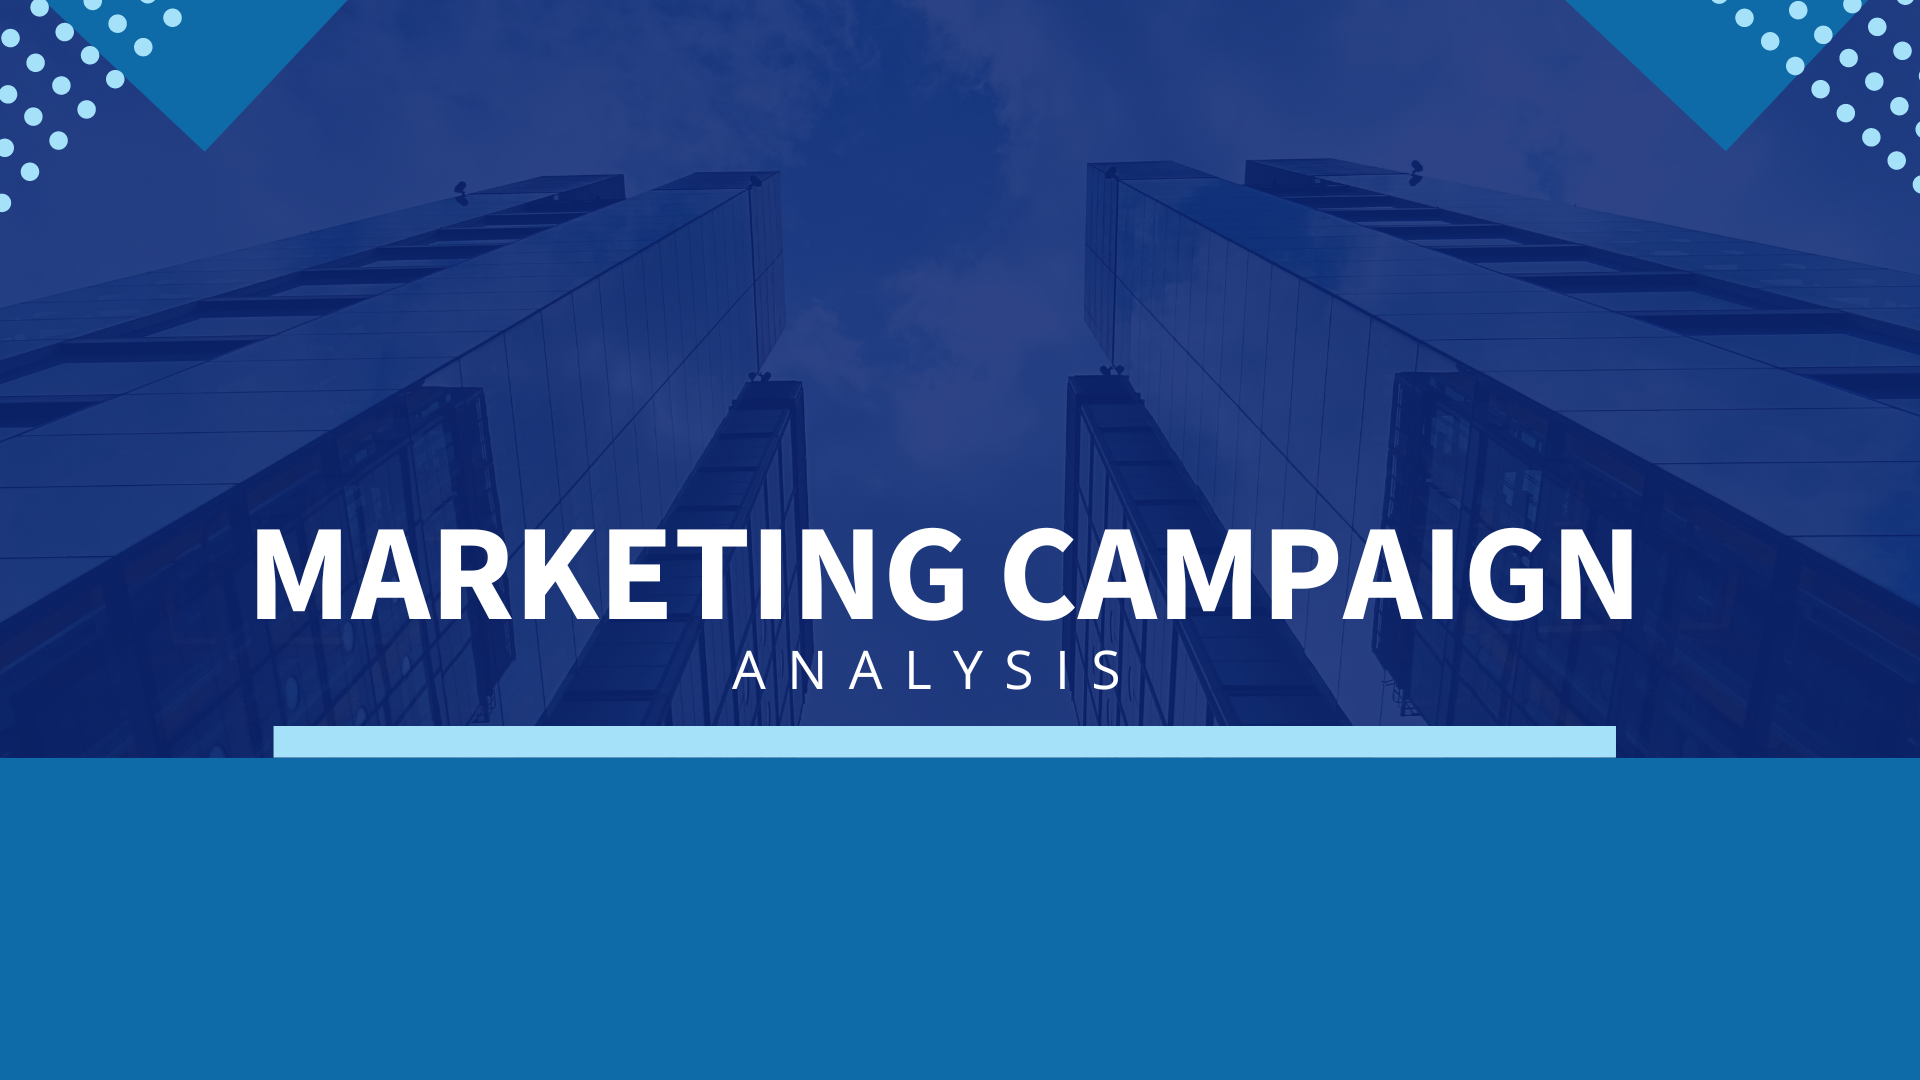

In [1]:
from IPython.display import Image
Image(filename=r"C:\Users\Dalkeith J Thomas\OneDrive - The University of the West Indies, Mona Campus\Data Science Projects\Title Page.png")

<div style="background-color: #ffffff; color: #11100e; padding: 10px; font-family: 'Times New Roman', Times, serif;">
    <p><strong>This notebook analyzes a marketing campaign by quantifying various metrics,in addition to visualizing data and running A/B testing. This is a fictional dataset from Datacamp. </strong></p>
</div>


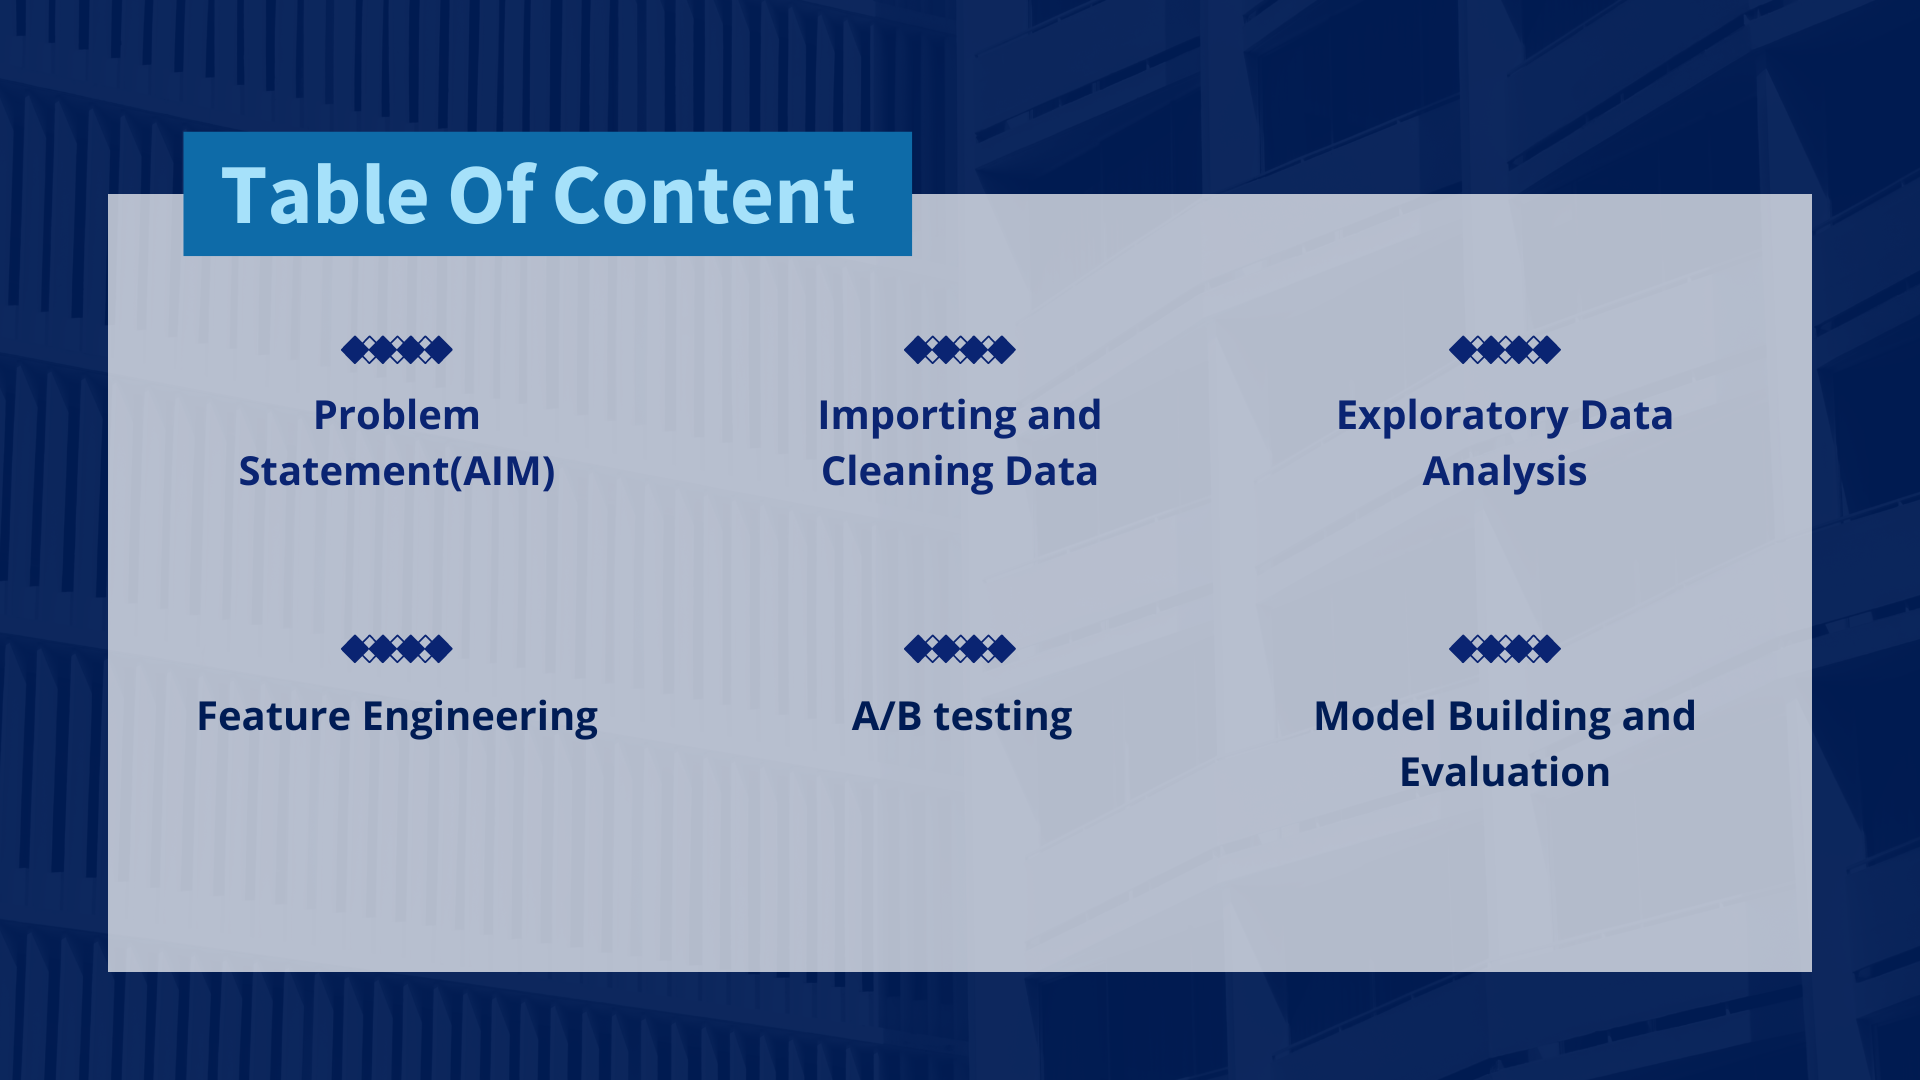

In [3]:
Image(filename=r"C:\Users\Dalkeith J Thomas\OneDrive - The University of the West Indies, Mona Campus\Data Science Projects\2.png")

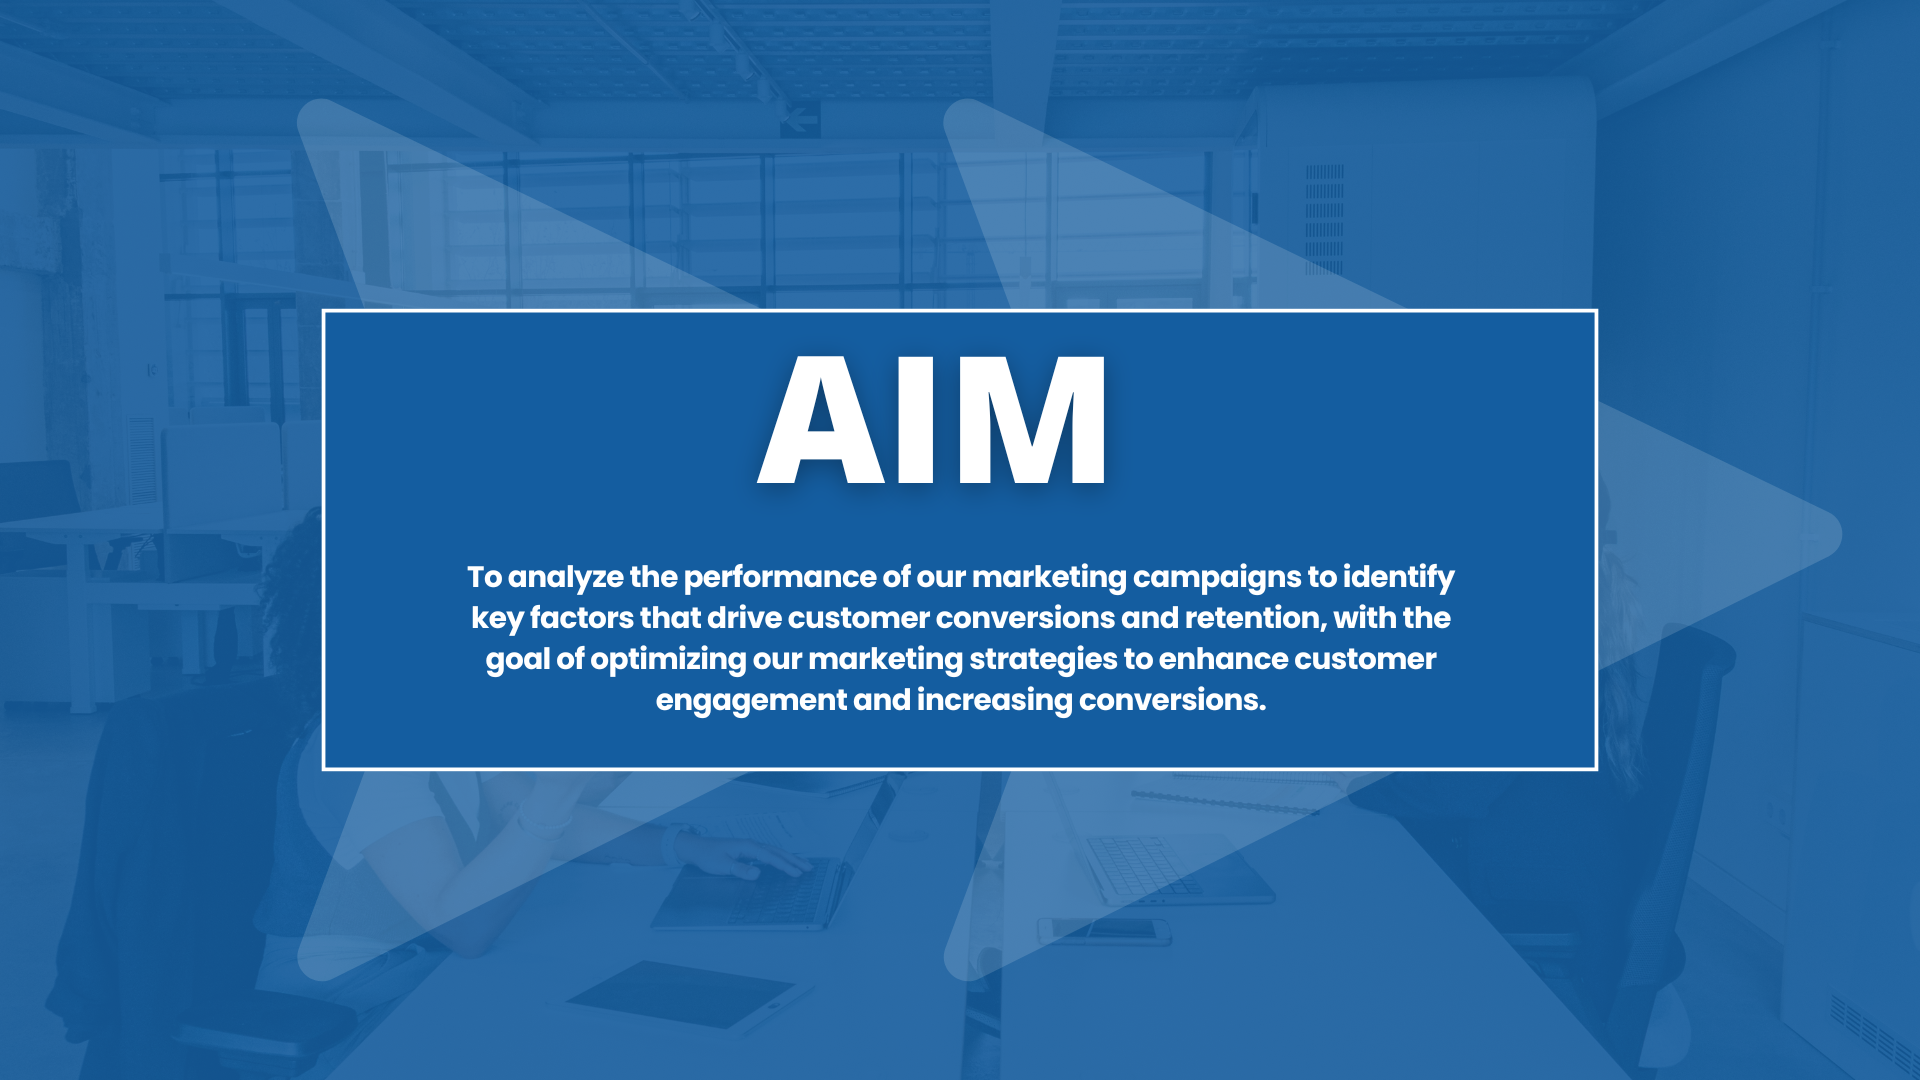

In [2]:
Image(filename=r"C:\Users\Dalkeith J Thomas\OneDrive - The University of the West Indies, Mona Campus\Data Science Projects\Aim.png")

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

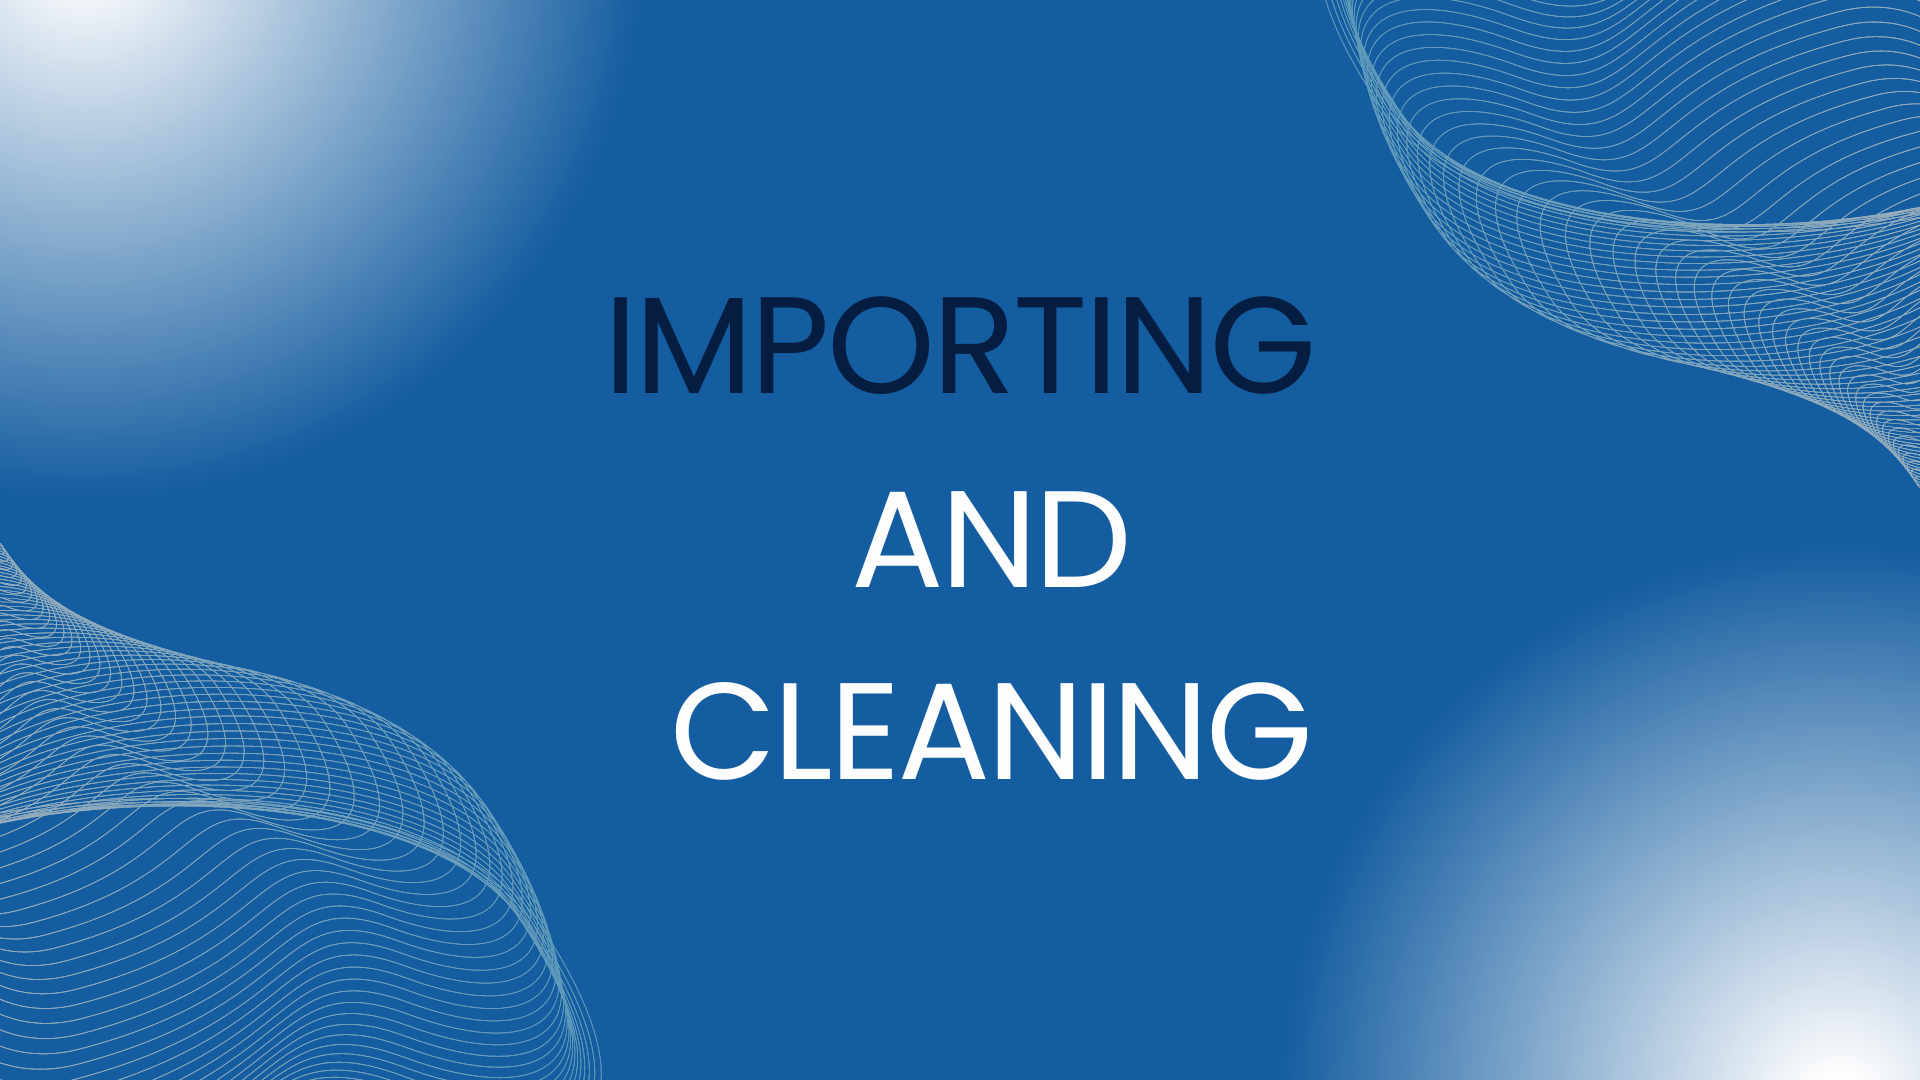

In [9]:
Image(filename=r"C:\Users\Dalkeith J Thomas\Downloads\Importing and Cleaning.png")

In [6]:
df=pd.read_csv(r"C:\Users\Dalkeith J Thomas\OneDrive - The University of the West Indies, Mona Campus\Data Science Projects\marketing_new.csv")

In [7]:
df.shape

(10037, 16)

In [8]:
df.head()

Unnamed: 0     user_id date_served marketing_channel          variant  \
0           0  a100000029  2018-01-01         House Ads  personalization   
1           1  a100000030  2018-01-01         House Ads  personalization   
2           2  a100000031  2018-01-01         House Ads  personalization   
3           3  a100000032  2018-01-01         House Ads  personalization   
4           4  a100000033  2018-01-01         House Ads  personalization   

   converted language_displayed language_preferred    age_group  \
0       True            English            English   0-18 years   
1       True            English            English  19-24 years   
2       True            English            English  24-30 years   
3       True            English            English  30-36 years   
4       True            English            English  36-45 years   

  date_subscribed date_canceled subscribing_channel  is_retained  DoW  \
0      2018-01-01           NaN           House Ads         True  0.0   
1      2018-01-01           NaN           House Ads         True  0.0   
2      2018-01-01           NaN           House Ads         True  0.0   
3      2018-01-01           NaN           House Ads         True  0.0   
4      2018-01-01           NaN           House Ads         True  0.0   

   channel_code is_correct_lang  
0           1.0             Yes  
1           1.0             Yes  
2           1.0             Yes  
3           1.0             Yes  
4           1.0             Yes

<div style="background-color: #051d40; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong>The dataset has several columns most of which appear to be categorical. There are some columns that we will not be using in analysis, such as the unnamed column,is language correct column and channel code. As a result, I will be excluding those columns from the analysis.</strong></p>
</div>


In [9]:
df=df.drop(columns=['Unnamed: 0','is_correct_lang','channel_code'])

In [10]:
df.head()

user_id date_served marketing_channel          variant  converted  \
0  a100000029  2018-01-01         House Ads  personalization       True   
1  a100000030  2018-01-01         House Ads  personalization       True   
2  a100000031  2018-01-01         House Ads  personalization       True   
3  a100000032  2018-01-01         House Ads  personalization       True   
4  a100000033  2018-01-01         House Ads  personalization       True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years      2018-01-01   
1            English            English  19-24 years      2018-01-01   
2            English            English  24-30 years      2018-01-01   
3            English            English  30-36 years      2018-01-01   
4            English            English  36-45 years      2018-01-01   

  date_canceled subscribing_channel  is_retained  DoW  
0           NaN           House Ads         True  0.0  
1           NaN           House Ads         True  0.0  
2           NaN           House Ads         True  0.0  
3           NaN           House Ads         True  0.0  
4           NaN           House Ads         True  0.0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              10037 non-null  object 
 1   date_served          10021 non-null  object 
 2   marketing_channel    10022 non-null  object 
 3   variant              10037 non-null  object 
 4   converted            10037 non-null  bool   
 5   language_displayed   10037 non-null  object 
 6   language_preferred   10037 non-null  object 
 7   age_group            10037 non-null  object 
 8   date_subscribed      1856 non-null   object 
 9   date_canceled        577 non-null    object 
 10  subscribing_channel  1856 non-null   object 
 11  is_retained          10037 non-null  bool   
 12  DoW                  1856 non-null   float64
dtypes: bool(2), float64(1), object(10)
memory usage: 882.3+ KB


<div style="background-color: #051d40; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong>I will create a list of categorical variable, to check for the categorical options.</strong></p>
</div>

In [12]:
df_cat=df[["marketing_channel","variant","language_displayed","language_preferred","age_group","subscribing_channel"]]

In [13]:
for col in df_cat:
    print(df[col].value_counts())

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64
control            5091
personalization    4946
Name: variant, dtype: int64
English    9793
Spanish     136
German       81
Arabic       27
Name: language_displayed, dtype: int64
English    9275
Spanish     450
German      167
Arabic      145
Name: language_preferred, dtype: int64
19-24 years    1682
24-30 years    1568
0-18 years     1539
30-36 years    1355
36-45 years    1353
45-55 years    1353
55+ years      1187
Name: age_group, dtype: int64
Instagram    600
Facebook     445
House Ads    354
Email        290
Push         167
Name: subscribing_channel, dtype: int64


In [14]:
df.isna().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                 0
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained               0
DoW                    8181
dtype: int64

In [15]:
# I realized that Ids were often repeated and subscription date would be filled for one entry
df = df[df['user_id'].notnull() & df['date_subscribed'].notnull()]


In [16]:
df.isna().sum()

user_id                   0
date_served               0
marketing_channel         0
variant                   0
converted                 0
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed           0
date_canceled          1279
subscribing_channel       0
is_retained               0
DoW                       0
dtype: int64

<div style="background-color: #051d40; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong>I will be creating an is_active column, which gathers its data from date canceled, since the empty days within that column is due to the subscription being continued.</strong></p>
</div>

In [17]:
df['is_active'] = df['date_canceled'].isnull().astype('bool')


In [18]:
df.head()

user_id date_served marketing_channel          variant  converted  \
0  a100000029  2018-01-01         House Ads  personalization       True   
1  a100000030  2018-01-01         House Ads  personalization       True   
2  a100000031  2018-01-01         House Ads  personalization       True   
3  a100000032  2018-01-01         House Ads  personalization       True   
4  a100000033  2018-01-01         House Ads  personalization       True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years      2018-01-01   
1            English            English  19-24 years      2018-01-01   
2            English            English  24-30 years      2018-01-01   
3            English            English  30-36 years      2018-01-01   
4            English            English  36-45 years      2018-01-01   

  date_canceled subscribing_channel  is_retained  DoW  is_active  
0           NaN           House Ads         True  0.0       True  
1           NaN           House Ads         True  0.0       True  
2           NaN           House Ads         True  0.0       True  
3           NaN           House Ads         True  0.0       True  
4           NaN           House Ads         True  0.0       True

<div style="background-color: #051d40; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong>I will be converting the date columns from object.</strong></p>
</div>

In [19]:
df_date=df[['date_served','date_subscribed','date_canceled',]]

In [20]:
for var in df_date:
    df[var]=pd.to_datetime(df_date[var],format='%Y-%m-%d')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1856 entries, 0 to 10036
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              1856 non-null   object        
 1   date_served          1856 non-null   datetime64[ns]
 2   marketing_channel    1856 non-null   object        
 3   variant              1856 non-null   object        
 4   converted            1856 non-null   bool          
 5   language_displayed   1856 non-null   object        
 6   language_preferred   1856 non-null   object        
 7   age_group            1856 non-null   object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   bool          
 12  DoW                  1856 non-null   float64       
 13  is_active            1856 non-nu

In [22]:
df['DoW'] = df['date_served'].dt.day_name()


In [23]:
df_cat=df[["marketing_channel","variant","language_displayed","language_preferred","age_group","subscribing_channel","DoW"]]

In [24]:
df.head()

user_id date_served marketing_channel          variant  converted  \
0  a100000029  2018-01-01         House Ads  personalization       True   
1  a100000030  2018-01-01         House Ads  personalization       True   
2  a100000031  2018-01-01         House Ads  personalization       True   
3  a100000032  2018-01-01         House Ads  personalization       True   
4  a100000033  2018-01-01         House Ads  personalization       True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years      2018-01-01   
1            English            English  19-24 years      2018-01-01   
2            English            English  24-30 years      2018-01-01   
3            English            English  30-36 years      2018-01-01   
4            English            English  36-45 years      2018-01-01   

  date_canceled subscribing_channel  is_retained     DoW  is_active  
0           NaT           House Ads         True  Monday       True  
1           NaT           House Ads         True  Monday       True  
2           NaT           House Ads         True  Monday       True  
3           NaT           House Ads         True  Monday       True  
4           NaT           House Ads         True  Monday       True

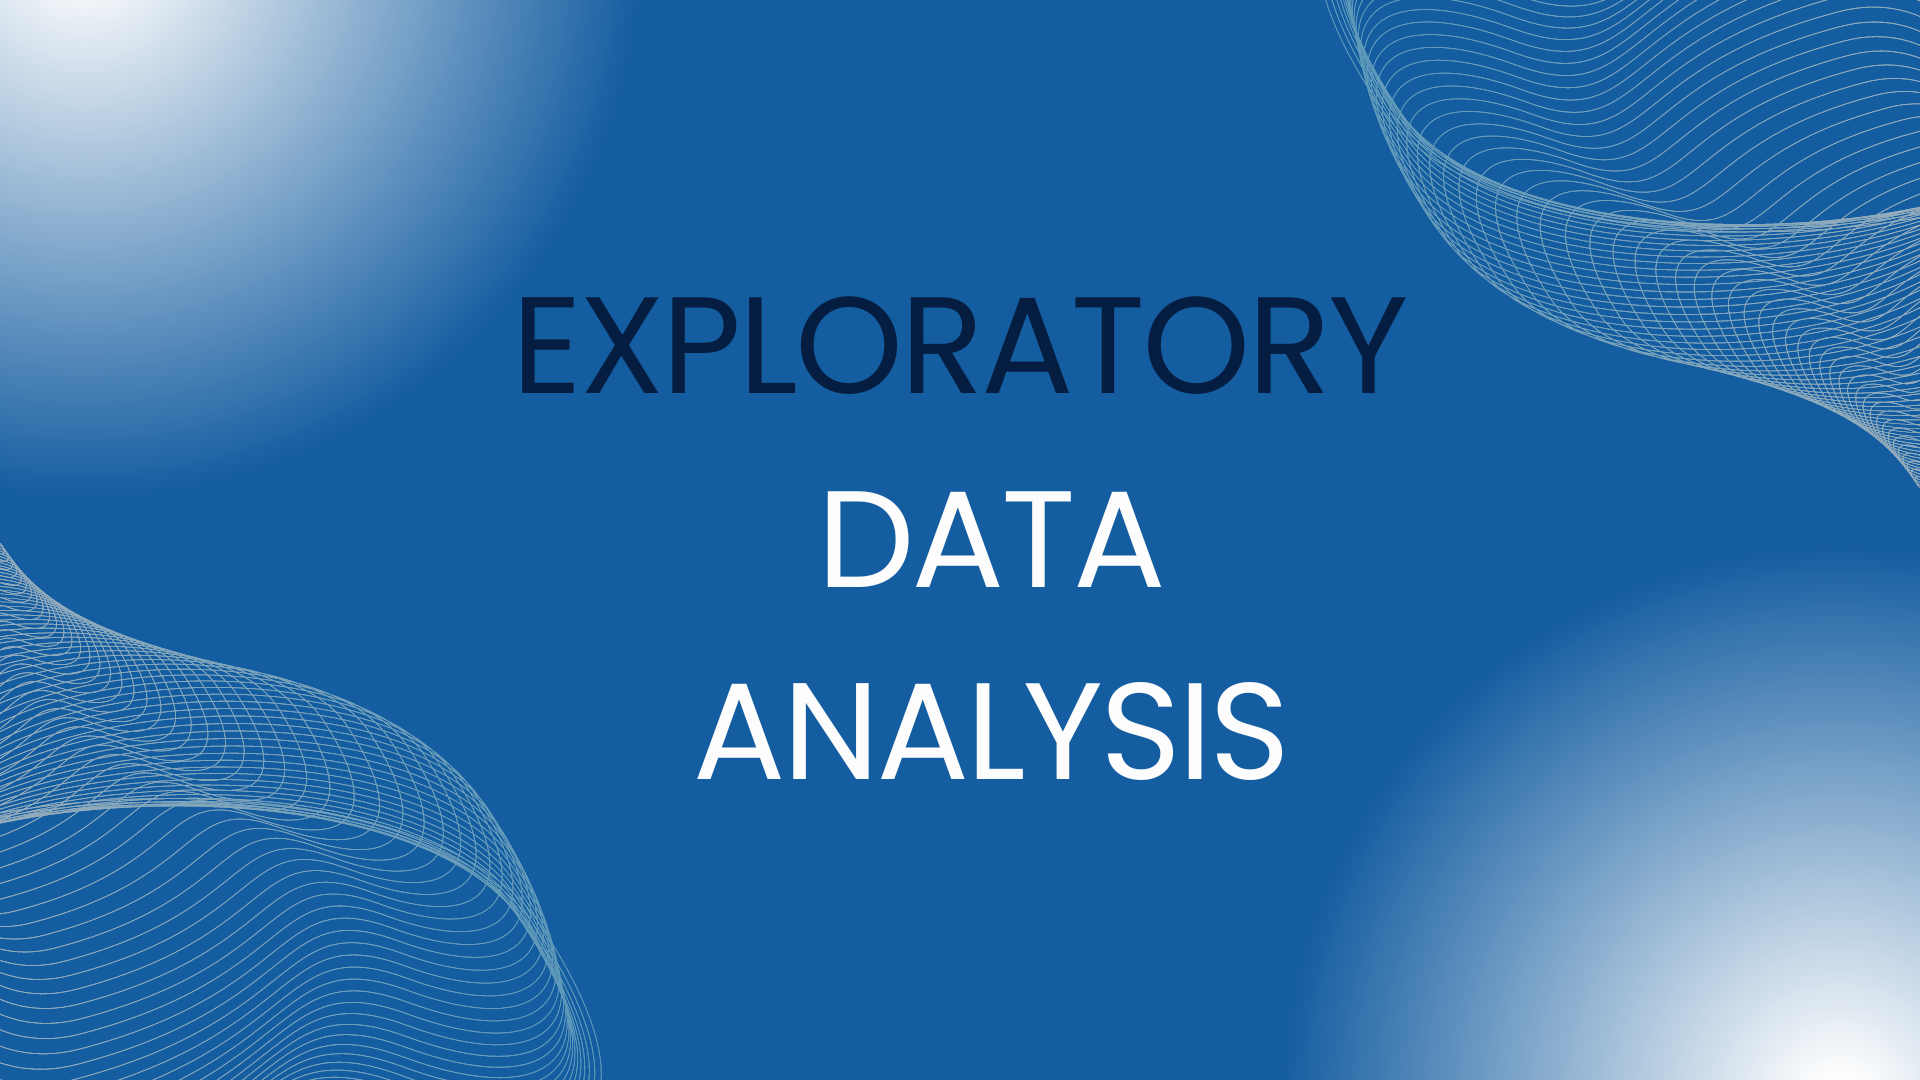

In [7]:
Image(filename=r"C:\Users\Dalkeith J Thomas\OneDrive - The University of the West Indies, Mona Campus\Data Science Projects\Exploratory D Analysis.png")

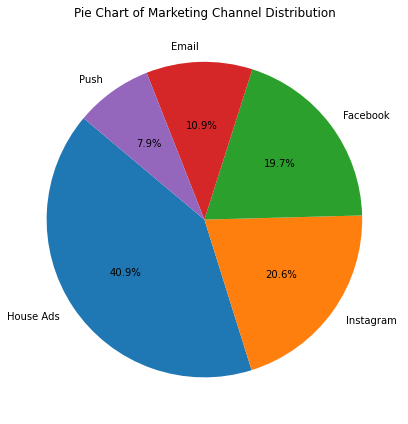

In [26]:
market_channel_cat=df['marketing_channel'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(market_channel_cat, labels=market_channel_cat.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Marketing Channel Distribution')
plt.tight_layout()
plt.show()

<div style="background-color: #0e6ba8; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong>The subscribing channel was mostly house ads, additionally social media was used extensively in this campaign, as Facebook and Instagram combine for over 40% of the distribution.</strong></p>
</div>

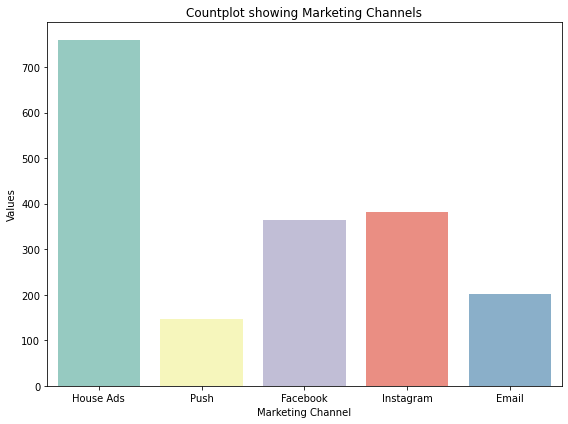

In [27]:

plt.figure(figsize=(8, 6))
sns.countplot(x='marketing_channel',data=df,palette="Set3")
plt.title('Countplot showing Marketing Channels')  
plt.xlabel('Marketing Channel')  
plt.ylabel('Values')  
plt.tight_layout() 
plt.show() 

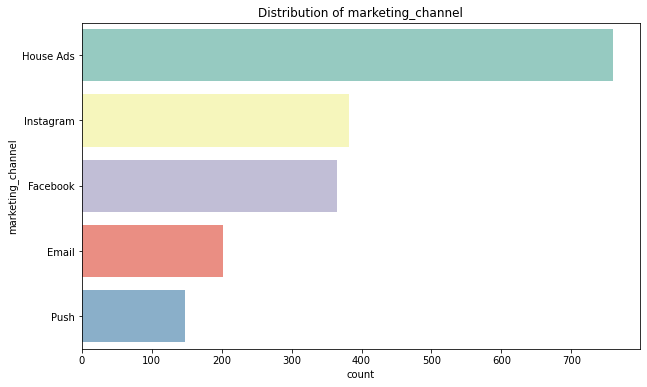

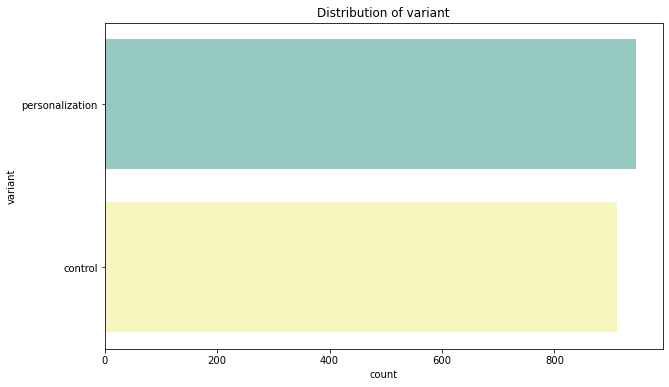

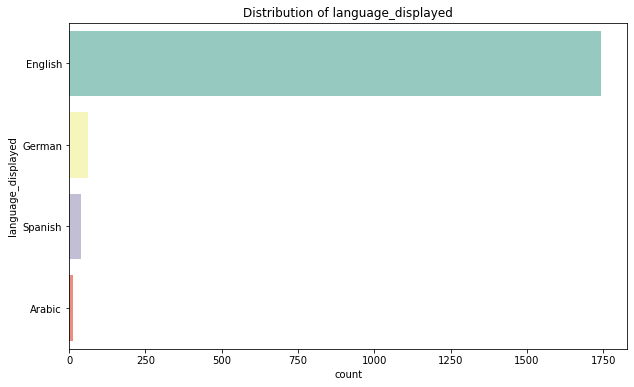

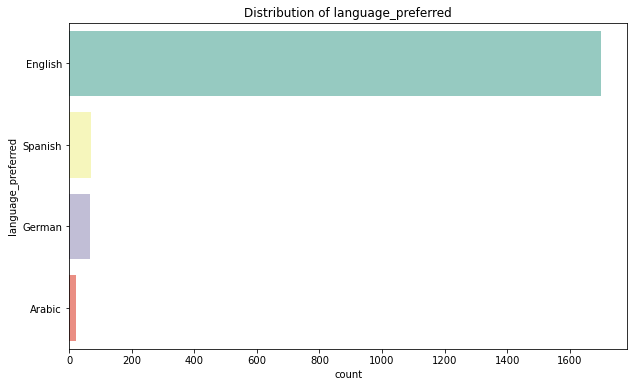

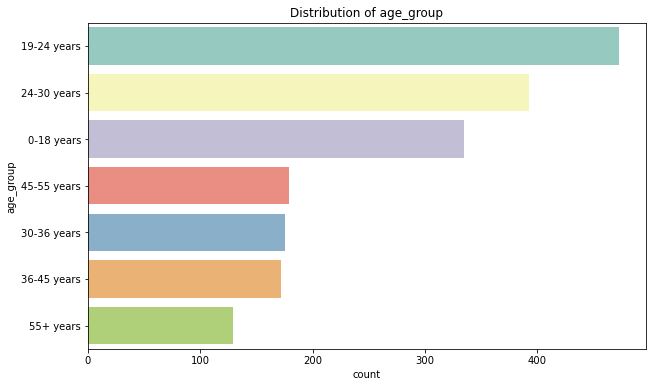

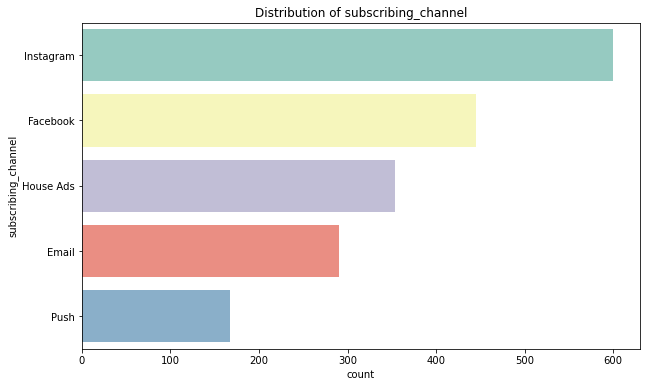

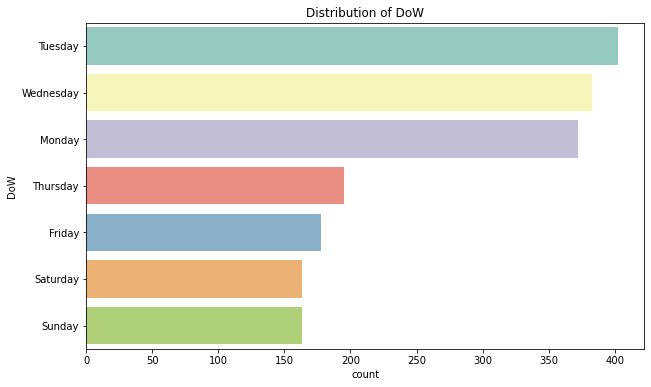

In [28]:
for col in df_cat:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index,palette='Set3')
    plt.title(f'Distribution of {col}')
    plt.show()

<div style="background-color: #0e6ba8; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong>The biggest age group are individuals from 19-24 years old,whereas the smaller is 55+ years old. Instagram is the biggest regarding subscribing channel and English is the most preferred language. </strong></p>
</div>

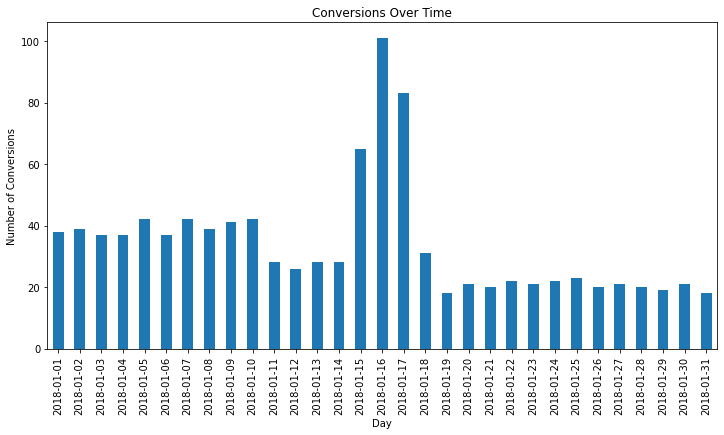

In [29]:
conversions_over_time = df.groupby(df['date_served'].dt.to_period('D'))['converted'].sum()
conversions_over_time.plot(kind='bar', figsize=(12, 6), title='Conversions Over Time')
plt.xlabel('Day')
plt.ylabel('Number of Conversions')
plt.show()

<div style="background-color: #0e6ba8; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong>The number of conversions slowed as the month continued, there was a spike in conversion around the middle of the month. I am going to investigate this particular spike, over the three day period, to see if there are any additional insights. </strong></p>
</div>

In [30]:

spike_filtered=['2018-01-15','2018-01-16','2018-01-17']
spike_filtered_df=df[df['date_served'].isin(spike_filtered)]

excluded_df=df[~df['date_served'].isin(spike_filtered)]


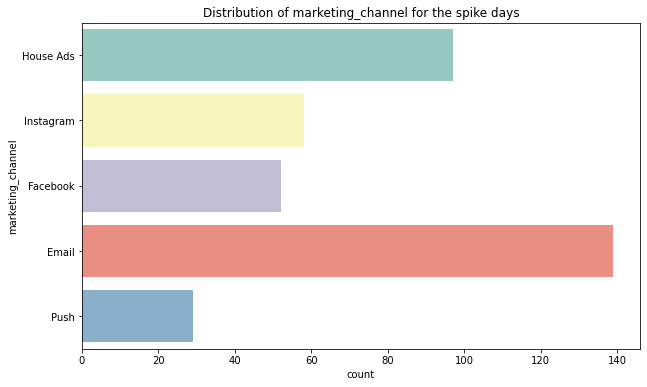

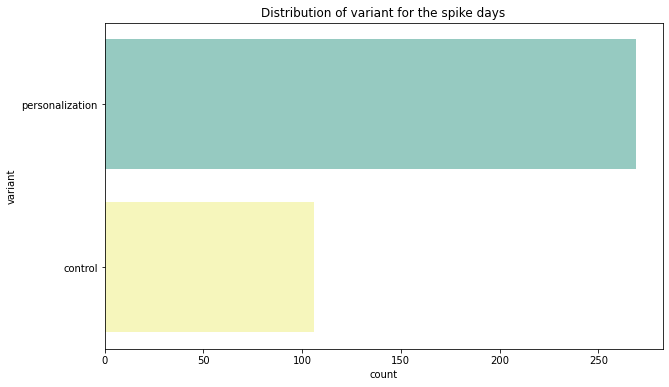

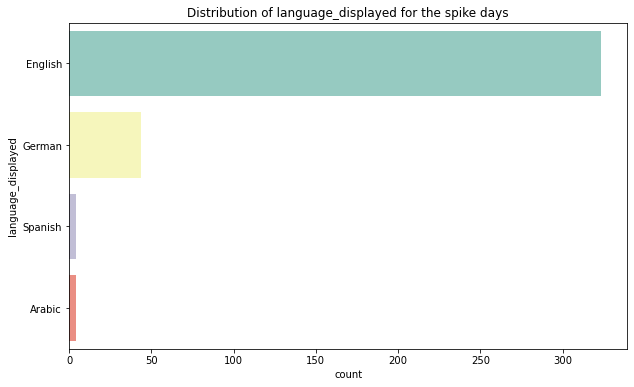

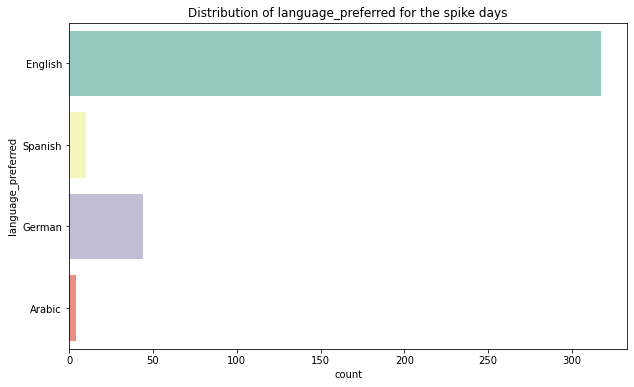

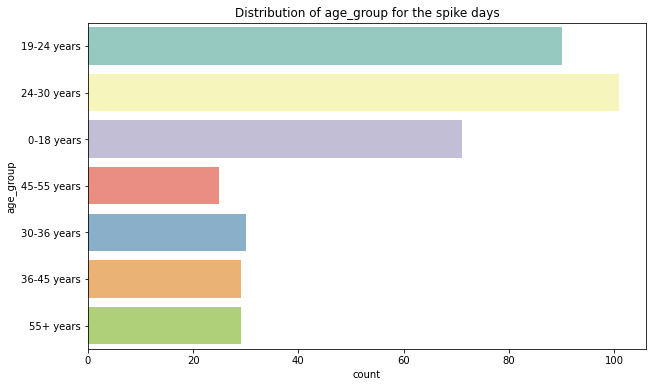

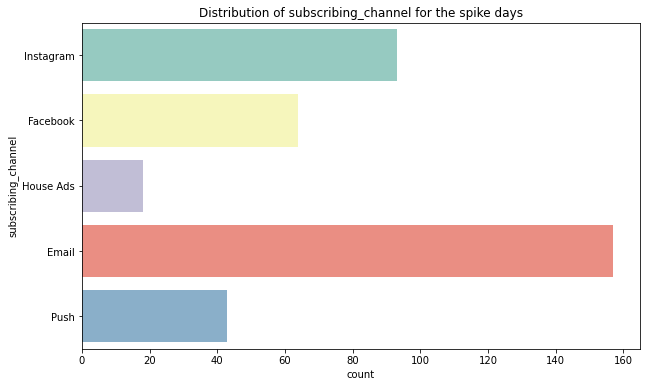

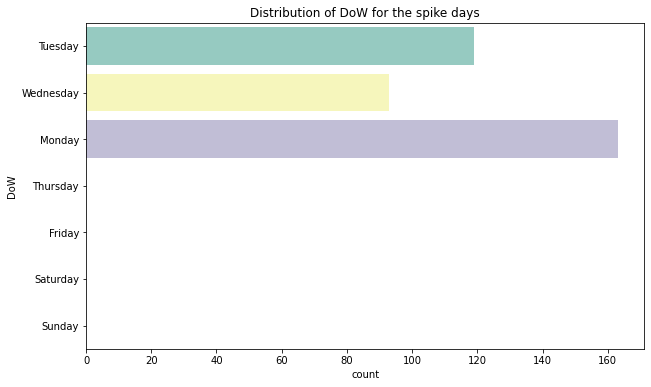

In [31]:
for col in df_cat:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=spike_filtered_df, order=df[col].value_counts().index,palette='Set3')
    plt.title(f'Distribution of {col} for the spike days')
    plt.show()

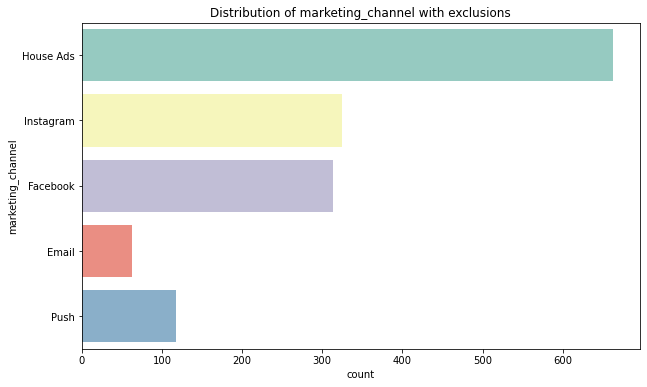

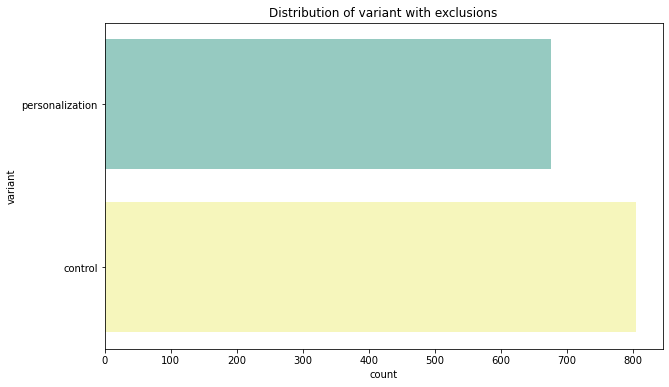

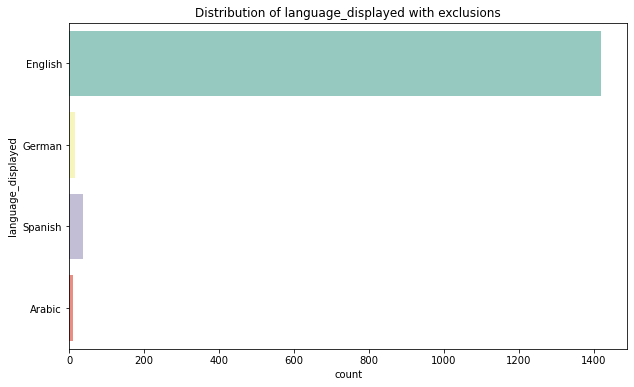

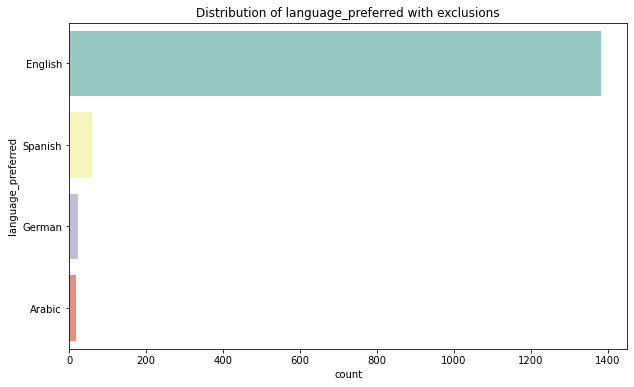

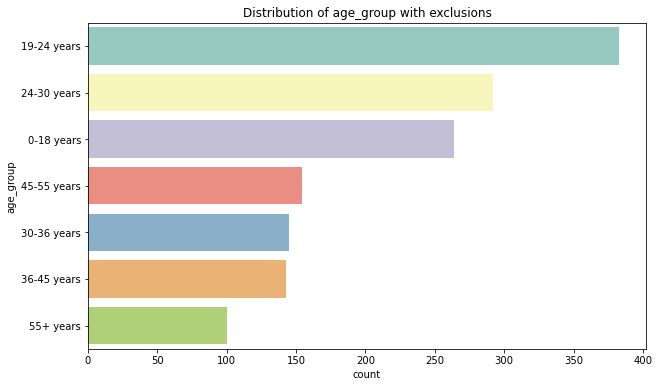

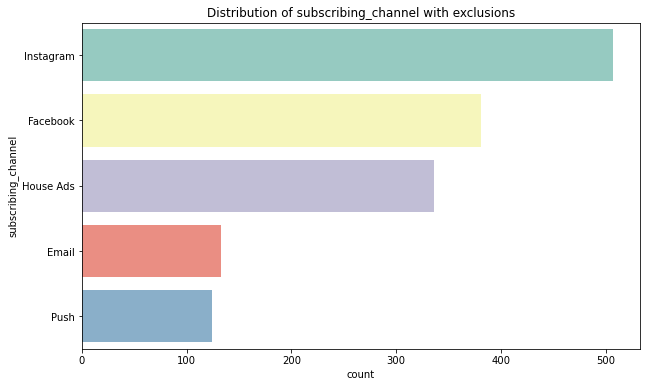

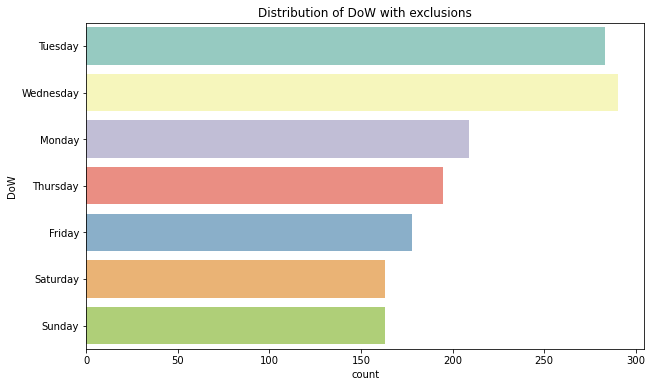

In [32]:
for col in df_cat:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=excluded_df, order=df[col].value_counts().index,palette='Set3')
    plt.title(f'Distribution of {col} with exclusions')
    plt.show()

<div style="background-color: #0e6ba8; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong> These particular days were characterized by highly personal emails in which 24-30 year olds, responded very favourably to. Emails that address recipients by name or their preferences can make the communication feel more personal and relevant. This demographic appreciates personalization, feeling that the brand understands and values them as individuals. This age group is generally very comfortable with digital communication and often uses email as a primary mode of receiving information and making decisions. They are more likely to open and act on emails if they perceive them as useful and engaging. </strong></p>
</div>

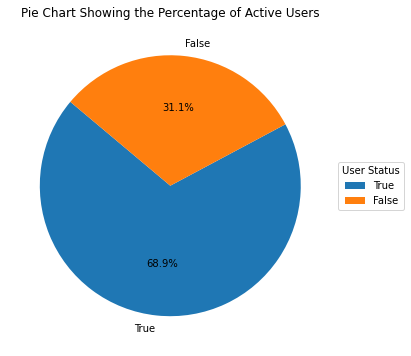

In [33]:
cancel_counts = df['is_retained'].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(cancel_counts, labels=cancel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Showing the Percentage of Active Users')

plt.legend(labels=cancel_counts.index, title="User Status", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()


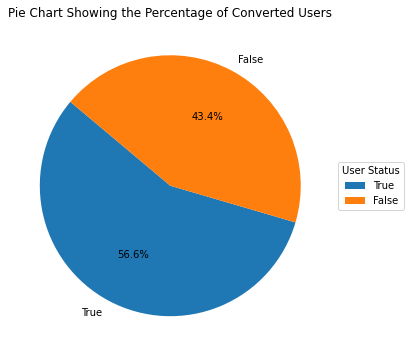

In [34]:
convert_counts = df['converted'].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(convert_counts, labels=convert_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Showing the Percentage of Converted Users')

plt.legend(labels=convert_counts.index, title="User Status", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

<div style="background-color: #0e6ba8; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong> The business retained more than 50% of its customers and also had a favourable conversion rate of over 50% </strong></p>
</div>

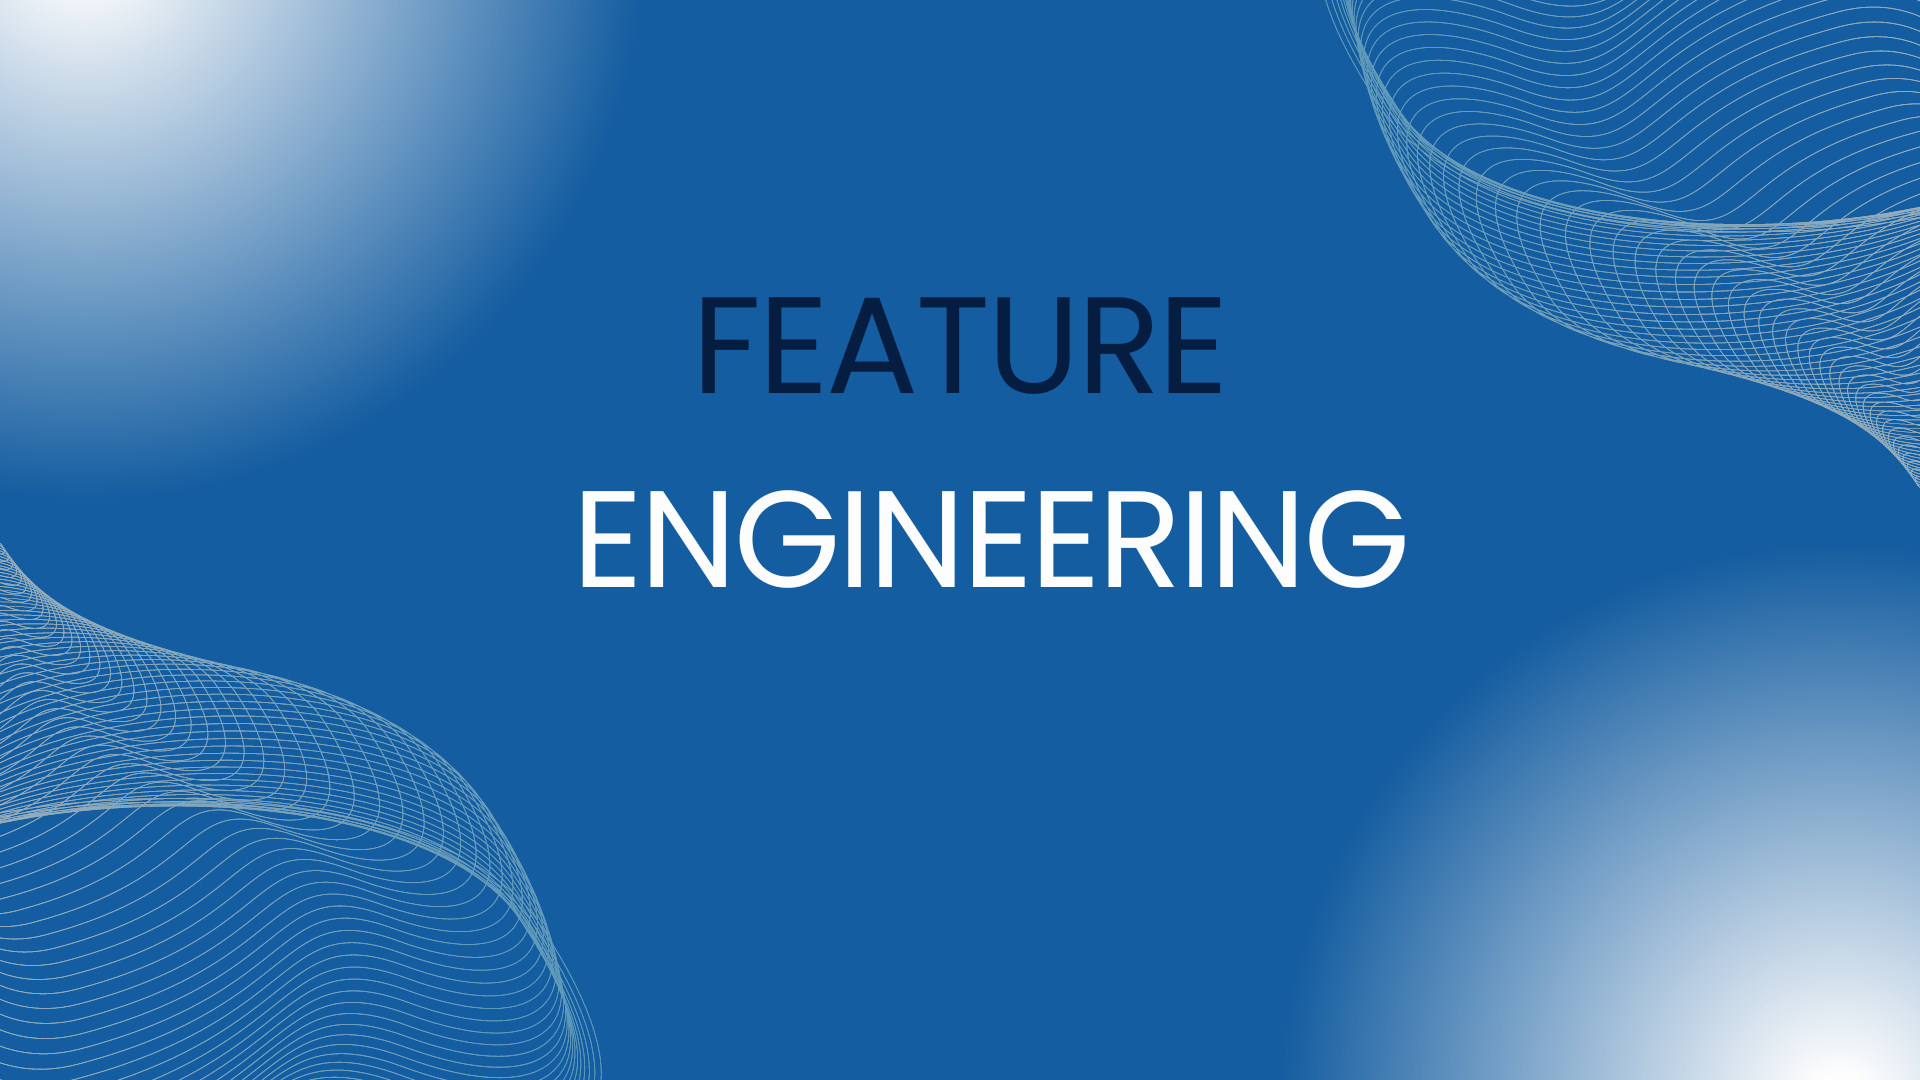

In [6]:
Image(filename=r"C:\Users\Dalkeith J Thomas\OneDrive - The University of the West Indies, Mona Campus\Data Science Projects\Feature Engineering.png")

<div style="background-color: #145da0; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong> Now I am going to general conversion and retention rates. </strong></p>
</div>

In [36]:
total_consumers=len(df)
total_converted=df[df['converted']==True].shape[0]
print(f"Total consumers : {total_consumers},Total converted : {total_converted}")

Total consumers : 1856,Total converted : 1050


In [37]:
total_conversion_rate=(total_converted/total_consumers)*100
print(f"The overall conversion rate is {total_conversion_rate:.2f}%")

The overall conversion rate is 56.57%


In [38]:
total_retained=df[df['is_retained']==True].shape[0]
total_retention_rate=(total_retained/total_consumers)*100
print(f"The overall retention rate is {total_retention_rate:.2f}%")

The overall retention rate is 68.91%


<div style="background-color: #145da0; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong> The company performed well in conversion metrics given that the rate is over 50%, in terms of retention rate the company performed average. </strong></p>
</div>

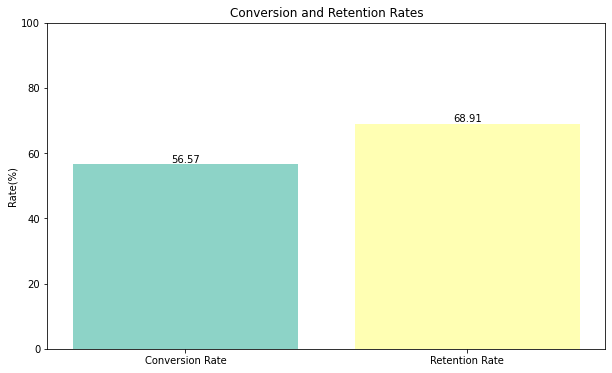

In [39]:
rates = {'Conversion Rate': total_conversion_rate, 'Retention Rate': total_retention_rate}
names = list(rates.keys())
values = list(rates.values())
colors = sns.color_palette("Set3", len(names))
plt.figure(figsize=(10, 6))
bars = plt.bar(names, values, color=colors)
plt.title('Conversion and Retention Rates')
plt.ylabel('Rate(%)')
plt.ylim(0, 100) 
for bar in bars.patches:
    y_val=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,y_val+0.05,f'{y_val:.2f}',ha='center',va='bottom')
plt.show()

<div style="background-color: #145da0; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong> I am going to create a conversion and retention function, given that I would be retyping the same code multiple times. </strong></p>
</div>

In [40]:
def conversion(column):
    column_conversion = df.groupby(column)['converted'].mean() * 100
    colors = sns.color_palette('Set3')
    plt.figure(figsize=(10,6))
    bars = column_conversion.plot(kind='bar', color=colors, title=f'Conversion Rate by {column}')
    plt.xlabel(column)
    plt.ylabel('Conversion Rate (%)')
    plt.xticks(rotation=45)
    
    for bar in bars.patches:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

In [41]:
def retention(column):
    column_retention = df.groupby(column)['is_retained'].mean() * 100
    colors = sns.color_palette('Set2')
    plt.figure(figsize=(10,6))
    bars = column_retention.plot(kind='bar', color=colors, title=f'Retention Rate by {column}')
    plt.xlabel(column)
    plt.ylabel('Retention Rate (%)')
    plt.xticks(rotation=45)
    
    for bar in bars.patches:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

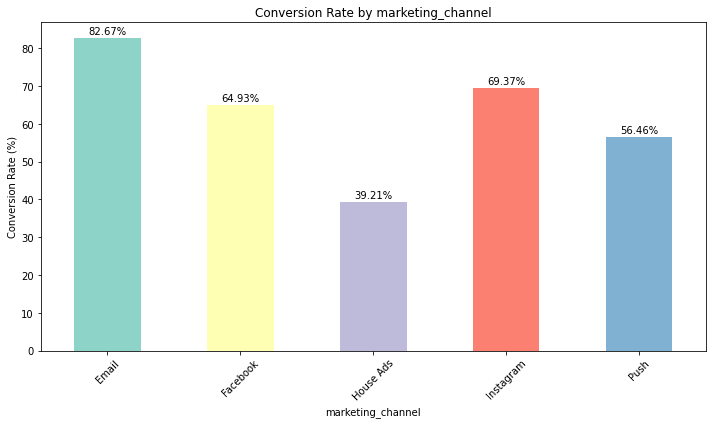

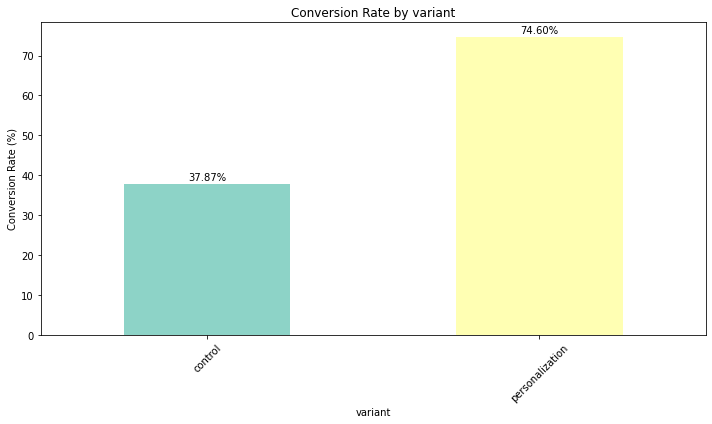

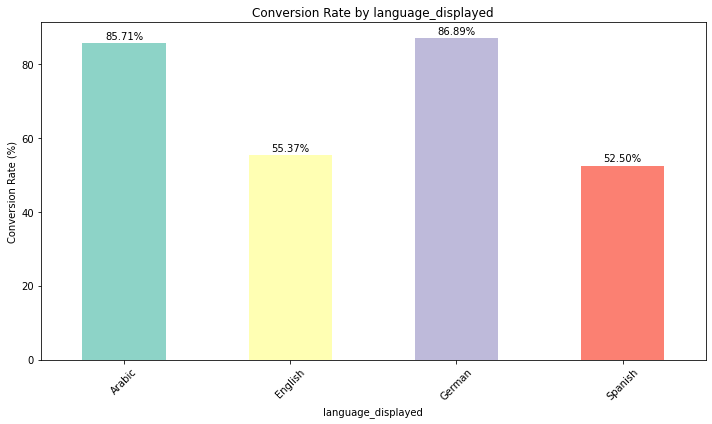

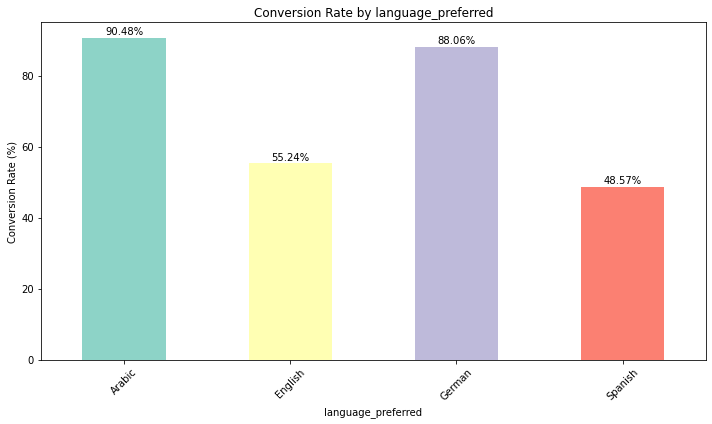

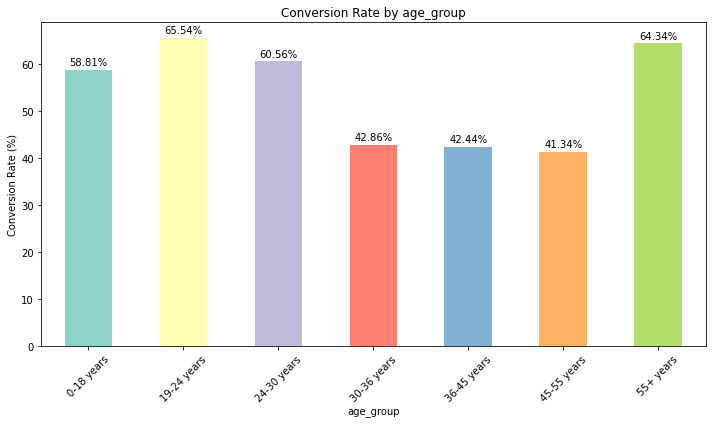

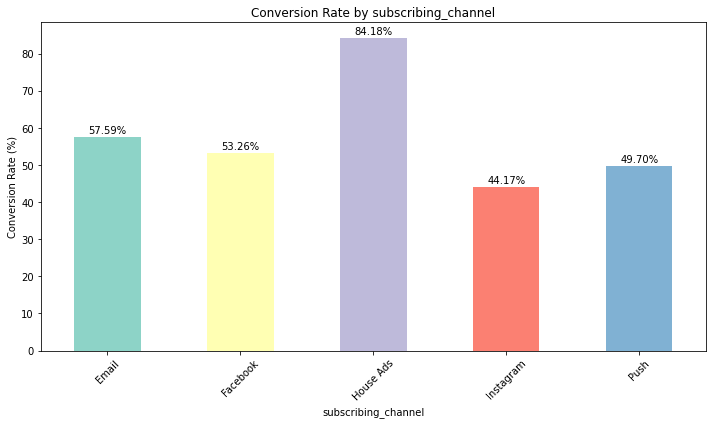

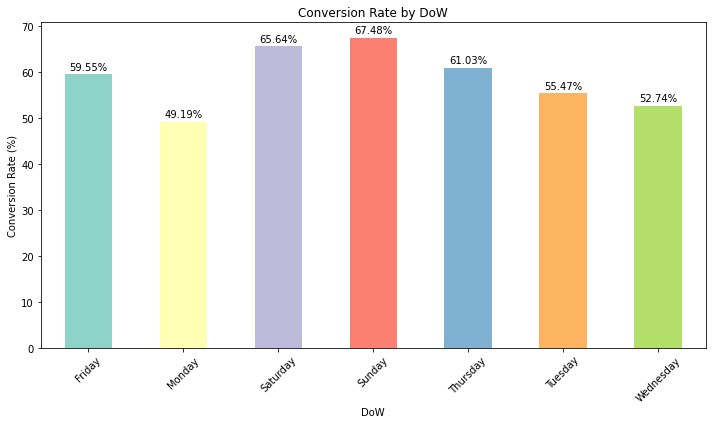

In [42]:
for col in df_cat:
    conversion(col)

<div style="background-color: #145da0; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong> In terms of conversion rates, email was the best performing marketing channel. This is possibly due to the three day spike in the middle of the month mentioned early. Personalization also had a stronger outcome relative to control implying that personalization results in more conversions. German language displayed resulted in the most conversions regarding languages. The highest conversion rate fell into the 19-24 age category, 55+ years in addition to 24-30 year olds also had high conversion rates. In terms of subscribing channels, House Ads had the highest rate. Weekends had higher conversion rates relative to weekdays. </strong></p>
</div>

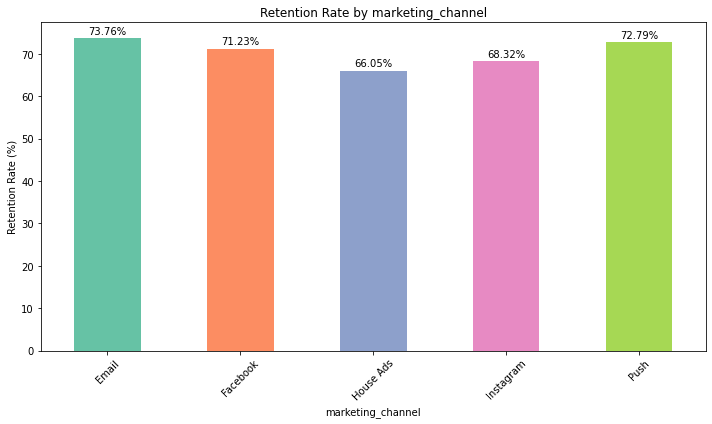

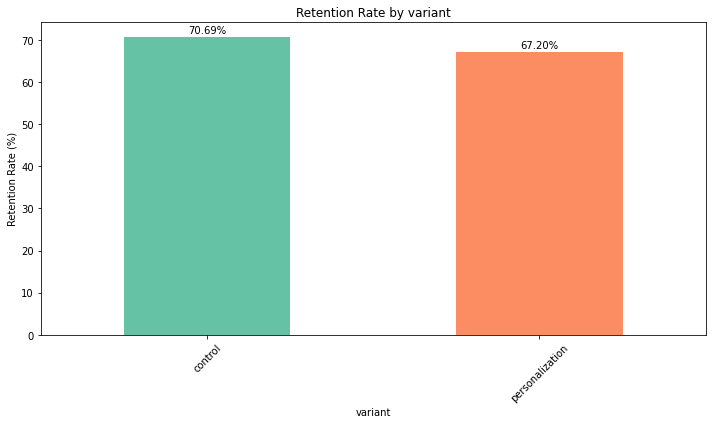

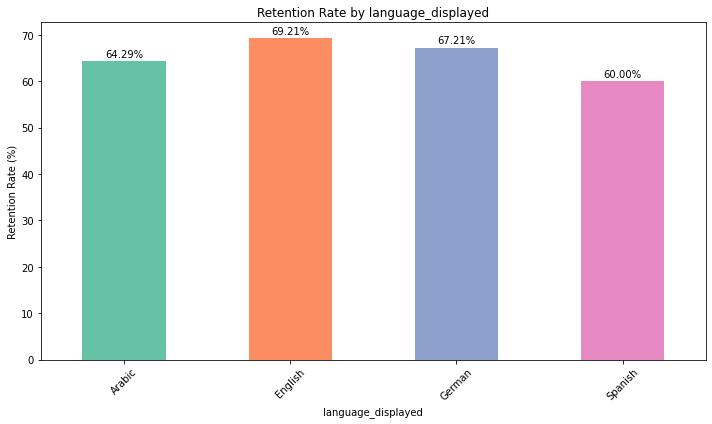

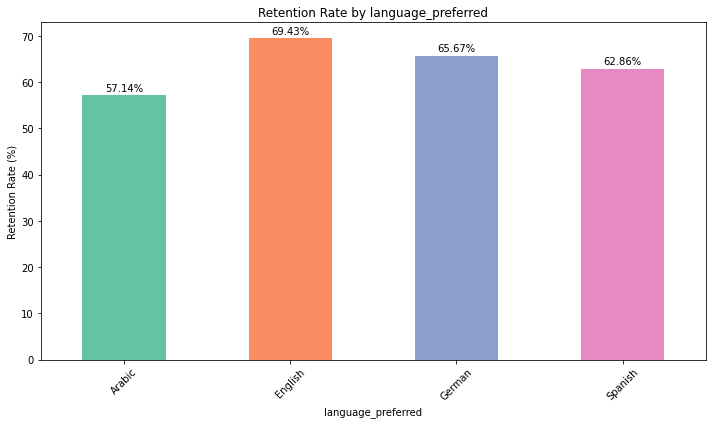

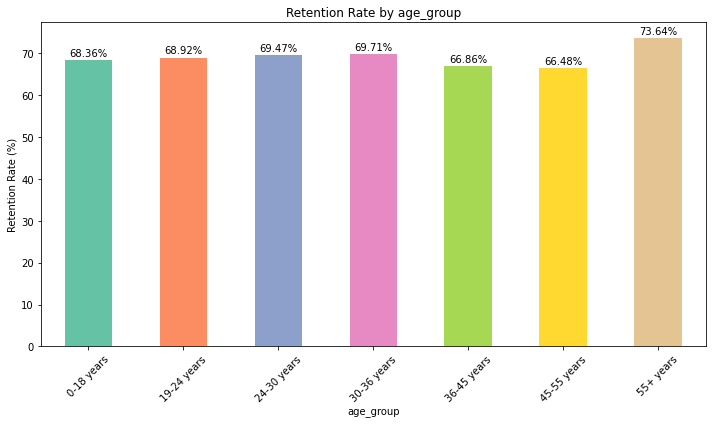

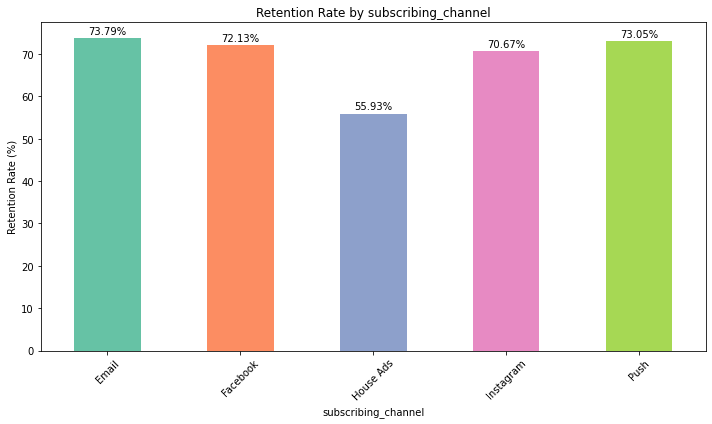

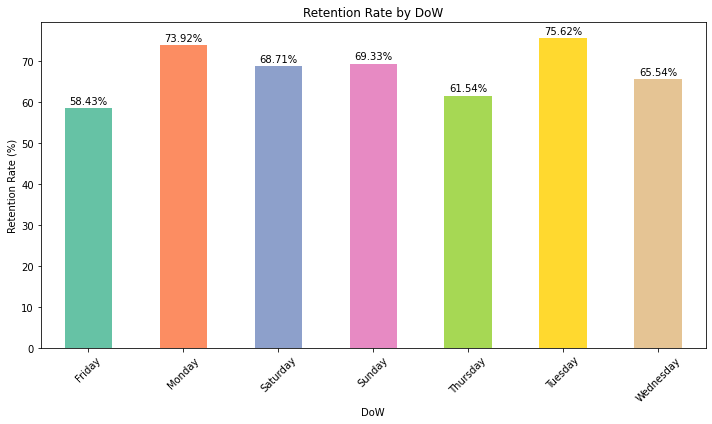

In [43]:
for col in df_cat:
    retention(col)

<div style="background-color: #145da0; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong> Regarding marketing channels, retention rates are fairly close, with email slightly superceding other markeitng channels.Control had a higher retain relative to personalization, which is the opposite when dealing with conversion. All displayed languages had retention rates above 60%. In terms of age group the group with the largest retention rate were 55+ years old. House Ads had the lowest retention rate, though it had the highest conversion rate as mentioned earlier. The Monday and Tuesday signup group had a higher retention rate than other days. </strong></p>
</div>

In [44]:
def heatmap(var1,var2):
    heatmap_data = pd.crosstab(df[var1], df[var2])
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f'Frequency of {var1} by {var2}')
    plt.xlabel(var2)
    plt.ylabel(var1)
    plt.show()

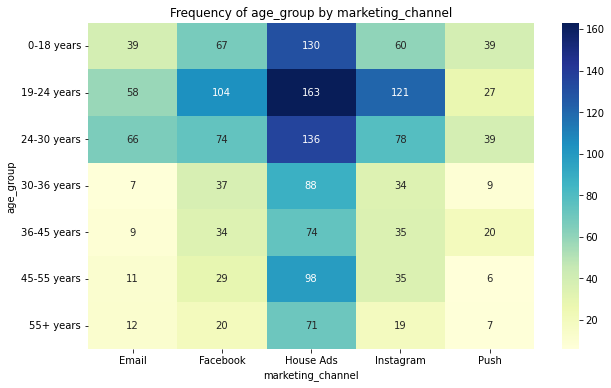

In [45]:
heatmap('age_group','marketing_channel')

<div style="background-color: #145da0; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong> 
The current marketing strategy might not be effectively resonating with the 36-45 and 45-55 age groups.House ads, as a marketing channel, seem to be less effective overall, especially for these age groups.There might be a misalignment between the messaging/content of the house ads and the preferences or needs of the targeted age groups.

        
Firstly,we could evaluate the content of the house ads. Conduct focus groups or surveys with the 36-45 and 45-55 age groups to understand their preferences and pain points. Thus, tailoring the message to better align with the interests and needs of these age groups.
Secondly, experiment with different marketing channels for the 36-45 and 45-55 age groups. For example, consider social media platforms, email marketing, or partnerships with influencers that cater to these demographics.</strong></p>
</div>

In [46]:
def ratemap(val,ind,col):
    heatmap_data = df.pivot_table(values=(val), index=(ind), columns=(col), aggfunc='mean')
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis")
    plt.title(f'{val} Rates by {col} and {ind}')
    plt.xlabel(col)
    plt.ylabel(ind)
    plt.show()

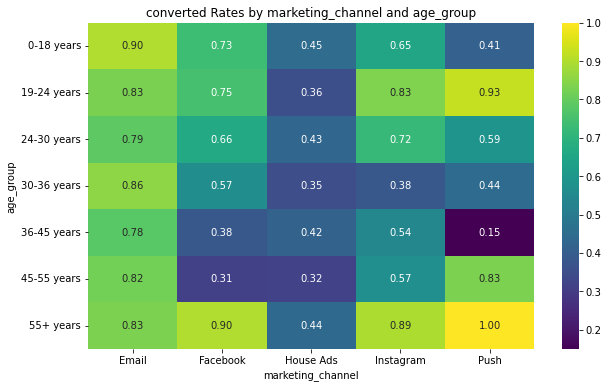

In [47]:
ratemap('converted','age_group','marketing_channel')

<div style="background-color: #145da0; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong> 
Though age groups 36-45 years old and 45-55 years old have such a low number of individuals within the email category, its conversion rate is extremely high in both. Thus, to attract more converts from the 36-45 group, they must target email based advertising, as this is the only channel with a  favourable conversion rate (above 50%). The 45-55 year old group has high conversion rates with emails and push notifications, as such these are the areas which must be targeted to increase the feedback from this group. The 30-36 year old group would also do well with an increase, with this in mind email is best received and as such resources should be specialized there.</strong></p>
</div>

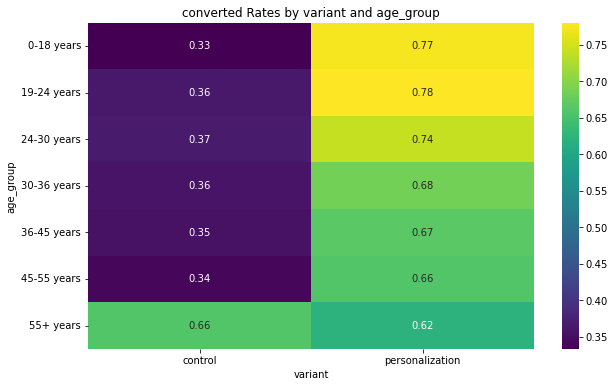

In [48]:
ratemap('converted','age_group','variant')

<div style="background-color: #145da0; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong> 
The personalization of the notification was best received by the youngest age group (those below 18 years old). All groups enjoyed the personal touch,though the conversion rate decreased with age, the conversion rate superceded the control rate for all groups, bar those who are 55+ years old.</strong></p>
</div>

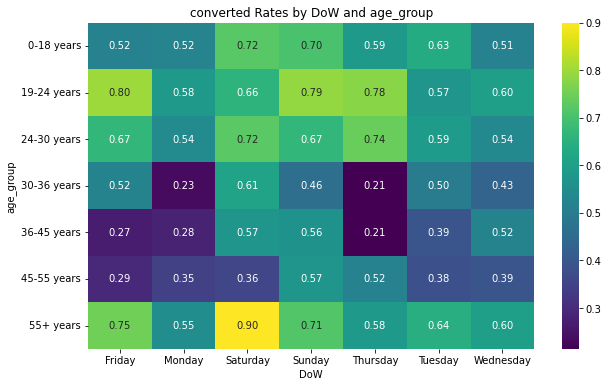

In [49]:
ratemap('converted','age_group','DoW')

<div style="background-color: #145da0; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong> 
Additionally, those aged 30-45 years old, respond most favourably on a Saturday.Whereas those in the 45-55 year old groups, respond most favourable on a Sunday. As a result, to improve conversion rates for these three groups, based on analysis it is best to offer personalized email advertisements on Saturdays for 30-45 year olds, and on Sunday for 45-55 year olds. </strong></p>
</div>

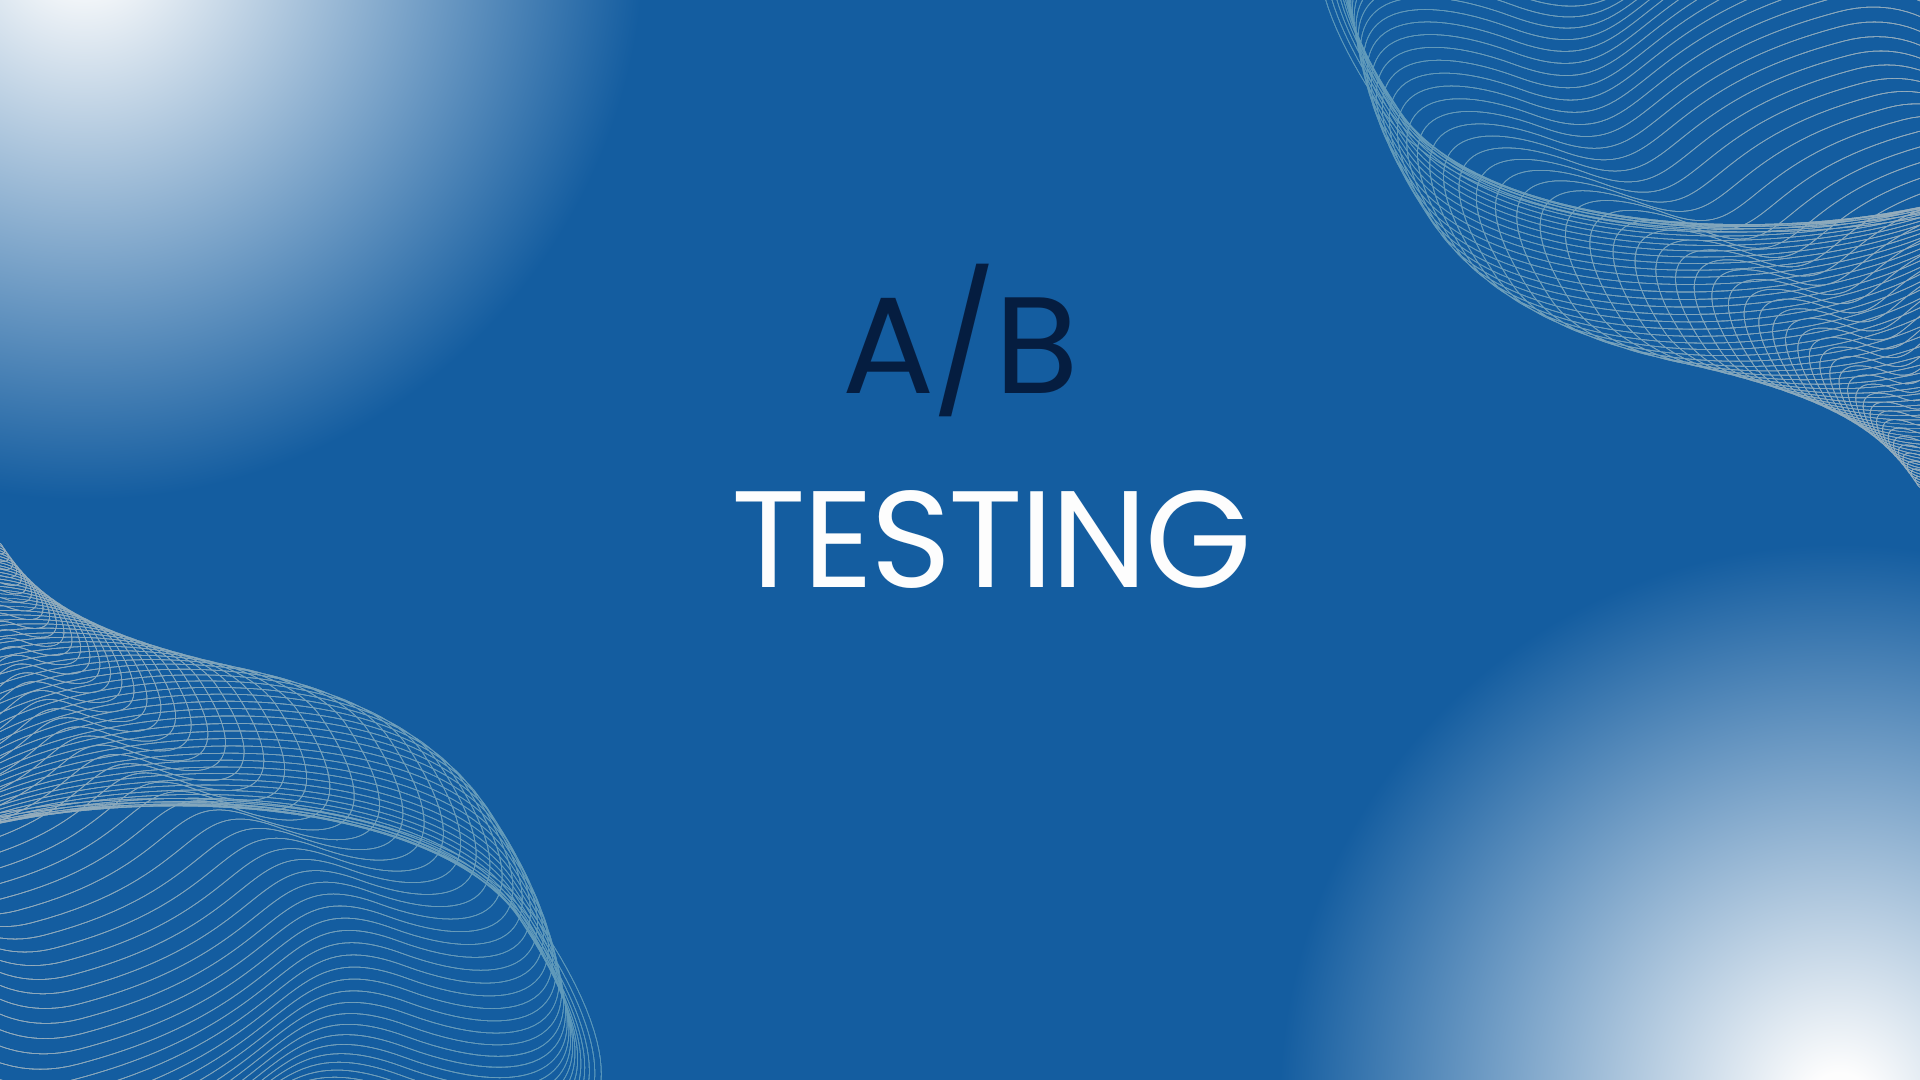

In [5]:
Image(filename=r"C:\Users\Dalkeith J Thomas\OneDrive - The University of the West Indies, Mona Campus\Data Science Projects\AB testing.png")

<div style="background-color: #5b98ba; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong> 
For the purpose of our A/B analysis, we will define:

Null Hypothesis (H0): There is no difference in the conversion rates between the personalization and control groups.
        <p><strong>
Alternative Hypothesis (H1): There is a difference in the conversion rates between the personalization and control groups. </strong></p>
        <p><strong>

I will be using a chi-squared test, since this test handles categorical, proportional data with binary outcomes easily. I will be investigating if there is a statistical significance between personalization (Advertisements with a personal touch) and control (Advertisements which stayed the same) ads.
</div>

In [51]:
conversion_rates = df.groupby('variant')['converted'].mean() * 100
print(conversion_rates)

variant
control            37.870472
personalization    74.603175
Name: converted, dtype: float64


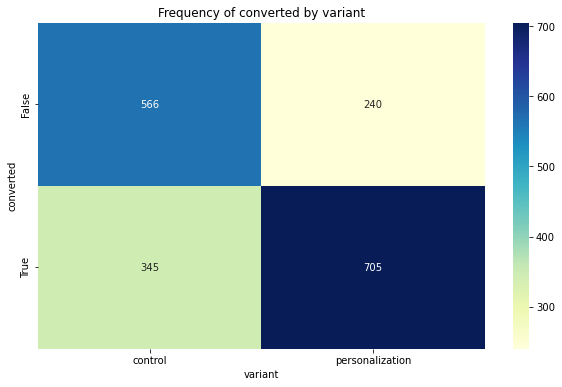

In [52]:
heatmap('converted','variant')

In [53]:

contingency_table = pd.crosstab(df['converted'], df['variant'])

chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-square: {chi2}, p-value: {p}")

#Assuming Alpha is 0.05
alpha = 0.05  
if p < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")


Chi-square: 253.25434002346478, p-value: 5.069698946689019e-57
Reject the null hypothesis: There is a significant difference between the groups.


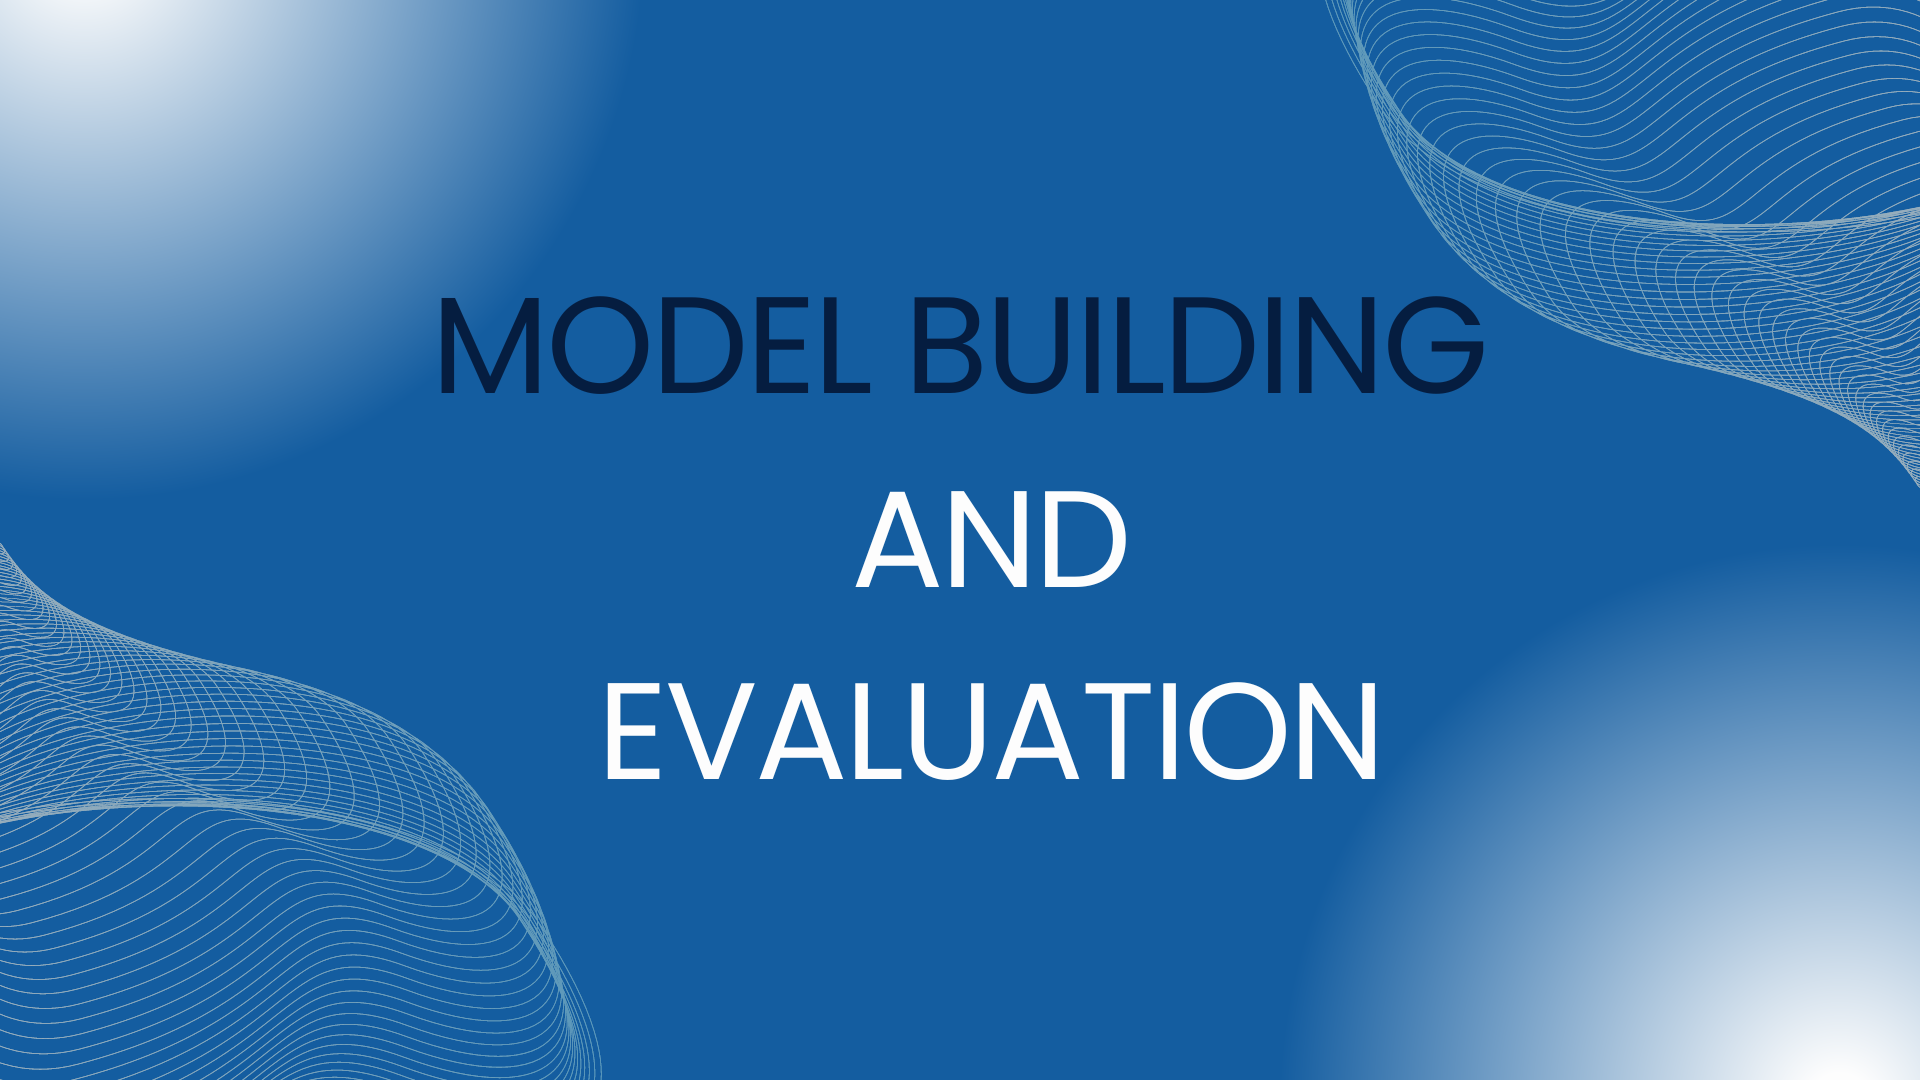

In [4]:
Image(filename=r"C:\Users\Dalkeith J Thomas\OneDrive - The University of the West Indies, Mona Campus\Data Science Projects\Importing and Cleaning.png")

In [55]:
df['converted']=df['converted'].astype(int)
df['is_retained']=df['is_retained'].astype(int)

In [56]:
columns_to_drop = ['user_id', 'date_served','date_subscribed','is_active','date_canceled']
df.drop(columns=columns_to_drop, inplace=True)
encoded_df = pd.get_dummies(df, columns=["marketing_channel","variant","language_displayed","language_preferred","age_group","subscribing_channel","DoW"])

print(encoded_df.head())

   converted  is_retained  marketing_channel_Email  \
0          1            1                        0   
1          1            1                        0   
2          1            1                        0   
3          1            1                        0   
4          1            1                        0   

   marketing_channel_Facebook  marketing_channel_House Ads  \
0                           0                            1   
1                           0                            1   
2                           0                            1   
3                           0                            1   
4                           0                            1   

   marketing_channel_Instagram  marketing_channel_Push  variant_control  \
0                            0                       0                0   
1                            0                       0                0   
2                            0                       0                0   
3 

In [57]:

X = encoded_df.drop('converted', axis=1)
y = encoded_df['converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

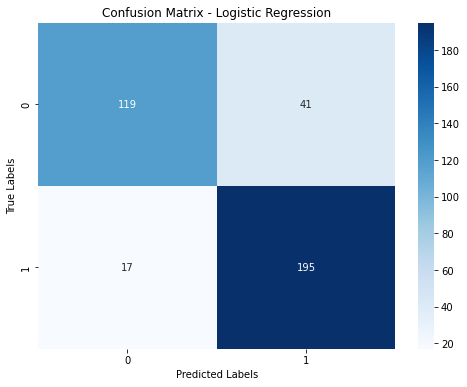

Logistic Regression Metrics:
Accuracy: 0.8441
Precision: 0.8263
Recall: 0.9198
F1 Score: 0.8705357142857143




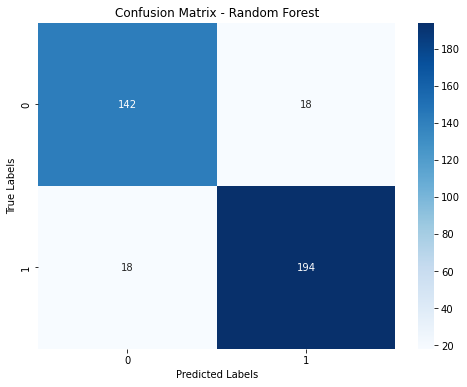

Random Forest Metrics:
Accuracy: 0.9032
Precision: 0.9151
Recall: 0.9151
F1 Score: 0.9150943396226415




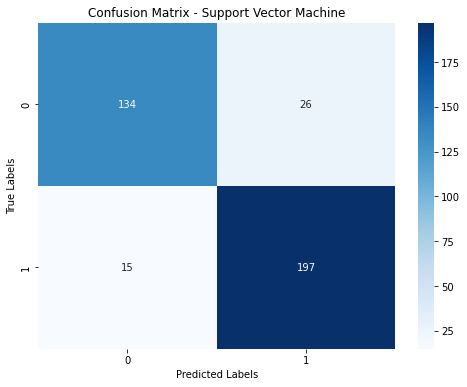

Support Vector Machine Metrics:
Accuracy: 0.8898
Precision: 0.8834
Recall: 0.9292
F1 Score: 0.9057471264367817




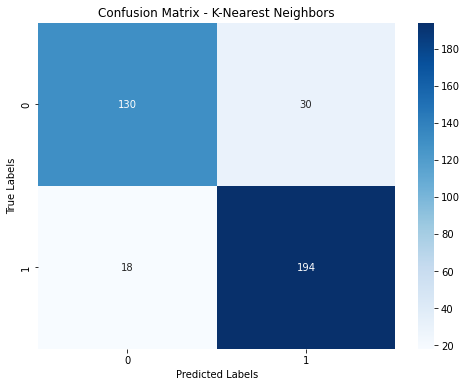

K-Nearest Neighbors Metrics:
Accuracy: 0.8710
Precision: 0.8661
Recall: 0.9151
F1 Score: 0.8899082568807338




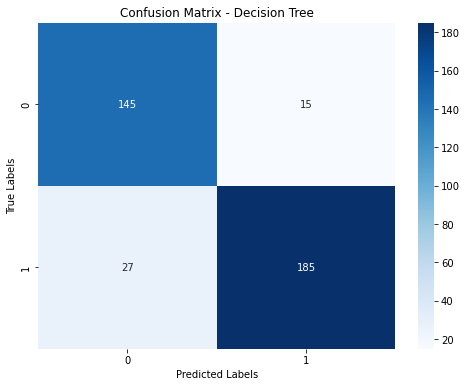

Decision Tree Metrics:
Accuracy: 0.8871
Precision: 0.9250
Recall: 0.8726
F1 Score: 0.8980582524271845




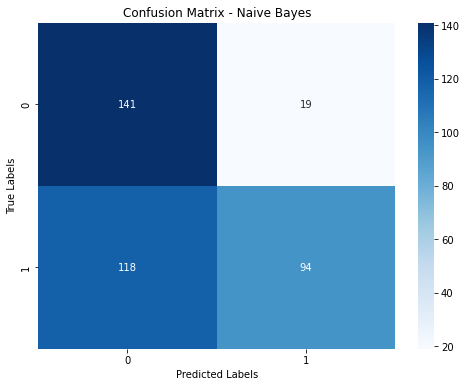

Naive Bayes Metrics:
Accuracy: 0.6317
Precision: 0.8319
Recall: 0.4434
F1 Score: 0.5784615384615385




In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix


#Classifiers dictionary
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}


for clf_name, clf in classifiers.items():
    # First to Train the classifier
    clf.fit(X_train, y_train)
    
    # Secondly, I Make predictions on the testing data
    y_pred = clf.predict(X_test)
    
    # Next I Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1=f1_score(y_test,y_pred)
    
     # To Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # To Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    # Print the scores for the current classifier
    print(f'{clf_name} Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1}')
    print('\n')

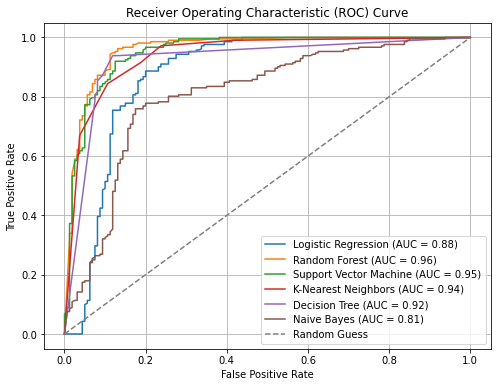

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))

#To plot the ROC curve, I will have to loop through the classifiers again
# Loop through classifiers and plot ROC curves

for clf_name, clf in classifiers.items():
    # Make predictions on the test data to get predicted probabilities, this selects all rows in column 1
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve(The true positive and false positive) 
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    # Calculates the area under the ROC curve which is the AUC score, a single scalar summarizing the classifier's performance
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {auc_score:.2f})')

# To Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

<div style="background-color: #145da0; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong> 
The most accurate classifier is random forest, scoring the highest precision, recall and F1 scores. </strong></p>
</div>

In [61]:
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [100, 200], 
    'max_depth': [None, 10],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2]  
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=5, cv=3, scoring='accuracy', n_jobs=-1)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

y_pred = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred))
rf=best_estimator

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       160
           1       0.92      0.92      0.92       212

    accuracy                           0.91       372
   macro avg       0.90      0.90      0.90       372
weighted avg       0.91      0.91      0.91       372



In [62]:
print(rf)

RandomForestClassifier(min_samples_split=5, random_state=42)


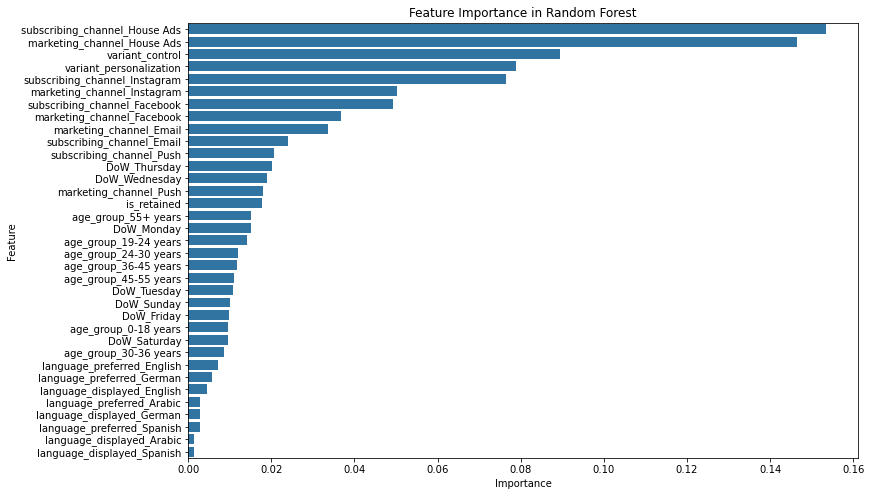

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Extract feature importances
feature_importances = rf.feature_importances_

# Creating a DataFrame 
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance in Random Forest')
plt.show()

In [68]:
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                          Feature  Importance
25  subscribing_channel_House Ads    0.153402
3     marketing_channel_House Ads    0.146371
6                 variant_control    0.089454
7         variant_personalization    0.078922
26  subscribing_channel_Instagram    0.076525
4     marketing_channel_Instagram    0.050185
24   subscribing_channel_Facebook    0.049337
2      marketing_channel_Facebook    0.036749
1         marketing_channel_Email    0.033639
23      subscribing_channel_Email    0.024058
27       subscribing_channel_Push    0.020620
32                   DoW_Thursday    0.020097
34                  DoW_Wednesday    0.018875
5          marketing_channel_Push    0.018051
0                     is_retained    0.017653
22            age_group_55+ years    0.015020
29                     DoW_Monday    0.014997
17          age_group_19-24 years    0.014192
18          age_group_24-30 years    0.011974
20          age_group_36-45 years    0.011857
21          age_group_45-55 years 

<div style="background-color: #145da0; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong> 
The most important feature determining if someone converted or not was house_ads, after which it was the controlled advertisement and then personalized advertisement. The least important features were language related features. Thus, to improve conversion rates the business should advertise through house advertisements less and personalize their ads even more. This will lead to a higher conversion rate across the demographic groups (Ages 35-55) which are significantly lower. </strong></p>
</div>

<div style="background-color: #145da0; color: #ffffff; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <p><strong> 
Recommendations for Improving Conversion Rates
        
1. Optimize House Advertisements:
        
Reduce Frequency: The most important feature determining if someone converted or not was house ads. To improve conversion rates, the business should reduce the frequency of house advertisements. Since, these conversion rates were the lowest relative to the other avenues.
        
Refinement: Analyze the performance of different house ads to identify which ones are performing poorly. Consider refining or replacing them with more engaging content. The business could opt to improve house ads, possibly catering to subsets which like house ads or drop house ads altogether.
        
2. Enhance Personalized Advertisements:
        
Data-Driven Personalization: Invest further into advanced data analytics to gain deeper insights into customer preferences and behavior. Use this data to create highly personalized advertisements that resonate with individual users.
        
Dynamic Content: Implement dynamic ad content that changes based on user interactions and preferences. This will ensure that each ad is relevant to the viewer, increasing the likelihood of conversion.
        
3. Controlled Advertisement:
        
A/B Testing: Continuously perform A/B testing on controlled advertisements to identify the most effective variations. Use the insights from these tests to optimize ad content, placement, and timing.
        
Targeted Campaigns: Create targeted ad campaigns based on specific user segments. Tailor the messaging and creatives to address the unique needs and interests of these segments.
        
4. Language-Related Features:
        
Localization: Even though language-related features were the least important, it's essential not to ignore them completely. Ensure that ads are properly localized to cater to different language speakers, enhancing user experience and potential engagement.
        
Cultural Relevance: Consider cultural nuances and preferences in the content of advertisements to make them more appealing to diverse demographic groups.
        
5. Focus on Demographic Groups (Ages 35-55):
        
Customized Strategies: Develop customized marketing strategies for the 35-55 age group. Understand their specific needs, preferences, and pain points to tailor advertisements that speak directly to them.
        
Engagement Channels: Identify the preferred channels and platforms for this demographic. Ensure that advertisements are prominently placed on these channels to maximize visibility and engagement.

6. Continuous Monitoring and Improvement:
        
Performance Analytics: Implement robust analytics to continuously monitor the performance of different advertisement types. Use these insights to make data-driven adjustments in real-time.
        
Feedback Loops: Establish feedback loops with customers to gather insights on their preferences and reactions to different advertisements. Use this feedback to refine and improve ad strategies.
        
7. Comprehensive Marketing Strategy:
        
Integrated Approach: Combine online and offline marketing efforts to create a seamless customer journey. Ensure consistency in messaging and branding across all touchpoints.
        
Collaborative Efforts: Work closely with sales, product, and customer service teams to align marketing strategies with overall business goals. This collaboration can lead to more cohesive and effective campaigns. </strong></p></div>